# Telecom Customer Churn Prediction

# Library Importation

In [1]:
#  pip list

In [2]:
# pip install --upgrade ydata-profiling

In [3]:
# !pip install imbalanced-learn

In [1]:
#Making necessary imports
import numpy as np  # linear algebra
import pandas as pd # data processing
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys
import folium
import sklearn
from sklearn import svm
from sklearn.svm import SVC
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.neighbors import NeighborhoodComponentsAnalysis,KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
from sklearn.preprocessing import MinMaxScaler
# from ydata_prhttp://localhost:8888/notebooks/OneDrive%20-%20Teesside%20University/Machine%20Learning/PREDICTING-CUSTOMER-CHURN-LEVERAGING-ML-IN-TELECOM-INDUSTRY/Telecom%20Customer%20Churn%20Prediction.ipynb#Data-Importationofiling import ProfileReport
from xgboost import XGBClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Data Importation

In [2]:
# Loading in the Dataset
Churn =pd.read_csv("Churn.csv")

# Initial Data Analysis

In [3]:
#Checking head of dataset (first 10)
Churn.head(n=10)

Customer ID  Gender  Age Married  Number of Dependents          City  \
0  0002-ORFBO  Female   37     Yes                     0  Frazier Park   
1  0003-MKNFE    Male   46      No                     0      Glendale   
2  0004-TLHLJ    Male   50      No                     0    Costa Mesa   
3  0011-IGKFF    Male   78     Yes                     0      Martinez   
4  0013-EXCHZ  Female   75     Yes                     0     Camarillo   
5  0013-MHZWF  Female   23      No                     3      Midpines   
6  0013-SMEOE  Female   67     Yes                     0        Lompoc   
7  0014-BMAQU    Male   52     Yes                     0          Napa   
8  0015-UOCOJ  Female   68      No                     0   Simi Valley   
9  0016-QLJIS  Female   43     Yes                     1      Sheridan   

   Zip Code   Latitude   Longitude  Number of Referrals  ...   Payment Method  \
0     93225  34.827662 -118.999073                    2  ...      Credit Card   
1     91206  34.162515 -118.203869                    0  ...      Credit Card   
2     92627  33.645672 -117.922613                    0  ...  Bank Withdrawal   
3     94553  38.014457 -122.115432                    1  ...  Bank Withdrawal   
4     93010  34.227846 -119.079903                    3  ...      Credit Card   
5     95345  37.581496 -119.972762                    0  ...      Credit Card   
6     93437  34.757477 -120.550507                    1  ...  Bank Withdrawal   
7     94558  38.489789 -122.270110                    8  ...      Credit Card   
8     93063  34.296813 -118.685703                    0  ...  Bank Withdrawal   
9     95681  38.984756 -121.345074                    3  ...      Credit Card   

  Monthly Charge Total Charges  Total Refunds Total Extra Data Charges  \
0          65.60        593.30           0.00                        0   
1          -4.00        542.40          38.33                       10   
2          73.90        280.85           0.00                        0   
3          98.00       1237.85           0.00                        0   
4          83.90        267.40           0.00                        0   
5          69.40        571.45           0.00                        0   
6         109.70       7904.25           0.00                        0   
7          84.65       5377.80           0.00                       20   
8          48.20        340.35           0.00                        0   
9          90.45       5957.90           0.00                        0   

  Total Long Distance Charges Total Revenue  Customer Status   Churn Category  \
0                      381.51        974.81           Stayed              NaN   
1                       96.21        610.28           Stayed              NaN   
2                      134.60        415.45          Churned       Competitor   
3                      361.66       1599.51          Churned  Dissatisfaction   
4                       22.14        289.54          Churned  Dissatisfaction   
5                      150.93        722.38           Stayed              NaN   
6                      707.16       8611.41           Stayed              NaN   
7                      816.48       6214.28           Stayed              NaN   
8                       73.71        414.06           Stayed              NaN   
9                     1849.90       7807.80           Stayed              NaN   

                    Churn Reason  
0                            NaN  
1                            NaN  
2  Competitor had better devices  
3        Product dissatisfaction  
4            Network reliability  
5                            NaN  
6                            NaN  
7                            NaN  
8                            NaN  
9                            NaN  

[10 rows x 38 columns]

In [4]:
# Checking size of dataset
Churn.shape

(7043, 38)

In [5]:
# Checking summary statistics of numerical features
Churn.describe()

Age  Number of Dependents      Zip Code     Latitude  \
count  7043.000000           7043.000000   7043.000000  7043.000000   
mean     46.509726              0.468692  93486.070567    36.197455   
std      16.750352              0.962802   1856.767505     2.468929   
min      19.000000              0.000000  90001.000000    32.555828   
25%      32.000000              0.000000  92101.000000    33.990646   
50%      46.000000              0.000000  93518.000000    36.205465   
75%      60.000000              0.000000  95329.000000    38.161321   
max      80.000000              9.000000  96150.000000    41.962127   

         Longitude  Number of Referrals  Tenure in Months  \
count  7043.000000          7043.000000       7043.000000   
mean   -119.756684             1.951867         32.386767   
std       2.154425             3.001199         24.542061   
min    -124.301372             0.000000          1.000000   
25%    -121.788090             0.000000          9.000000   
50%    -119.595293             0.000000         29.000000   
75%    -117.969795             3.000000         55.000000   
max    -114.192901            11.000000         72.000000   

       Avg Monthly Long Distance Charges  Avg Monthly GB Download  \
count                        6361.000000              5517.000000   
mean                           25.420517                26.189958   
std                            14.200374                19.586585   
min                             1.010000                 2.000000   
25%                            13.050000                13.000000   
50%                            25.690000                21.000000   
75%                            37.680000                30.000000   
max                            49.990000                85.000000   

       Monthly Charge  Total Charges  Total Refunds  Total Extra Data Charges  \
count     7043.000000    7043.000000    7043.000000               7043.000000   
mean        63.596131    2280.381264       1.962182                  6.860713   
std         31.204743    2266.220462       7.902614                 25.104978   
min        -10.000000      18.800000       0.000000                  0.000000   
25%         30.400000     400.150000       0.000000                  0.000000   
50%         70.050000    1394.550000       0.000000                  0.000000   
75%         89.750000    3786.600000       0.000000                  0.000000   
max        118.750000    8684.800000      49.790000                150.000000   

       Total Long Distance Charges  Total Revenue  
count                  7043.000000    7043.000000  
mean                    749.099262    3034.379056  
std                     846.660055    2865.204542  
min                       0.000000      21.360000  
25%                      70.545000     605.610000  
50%                     401.440000    2108.640000  
75%                    1191.100000    4801.145000  
max                    3564.720000   11979.340000

In [6]:
#Checking data types of each features and the number of non-null values.
Churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              3166 non-null   objec

In [7]:
#Checking number of null in each column
Churn.isnull().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                  

In [8]:
# Checking data types
Churn.dtypes

Customer ID                           object
Gender                                object
Age                                    int64
Married                               object
Number of Dependents                   int64
City                                  object
Zip Code                               int64
Latitude                             float64
Longitude                            float64
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Internet Type                         object
Avg Monthly GB Download              float64
Online Security                       object
Online Backup                         object
Device Protection Plan                object
Premium Tech Support                  object
Streaming 

In [9]:
# Finding Unique values in each columns

for i in Churn.columns:
    print("*************************************************",i,"************************************************************")
    print()
    print(set(Churn[i].tolist()))
    print()

************************************************* Customer ID ************************************************************

{'6322-PJJDJ', '9588-OZDMQ', '2886-KEFUM', '5606-AMZBO', '1697-NVVGY', '2911-UREFD', '3452-GWUIN', '1926-QUZNN', '7979-CORPM', '3580-HYCSP', '7975-JMZNT', '5092-STPKP', '4598-ZADCK', '6522-OIQSX', '4933-BSAIP', '9786-IJYDL', '2229-DPMBI', '1195-OIYEJ', '7969-AULMZ', '2616-FLVQC', '6434-TTGJP', '0607-DAAHE', '4983-CLMLV', '8679-JOEVF', '9819-FBNSV', '8514-VZHEB', '3211-ILJTT', '8859-YSTWS', '2592-SEIFQ', '2077-MPJQO', '0078-XZMHT', '8792-AOROI', '6734-JDTTV', '6032-IGALN', '7248-VZQLC', '5327-CNLUQ', '2717-HVIZY', '6921-OZMFH', '3640-PHQXK', '5896-NPFWW', '6908-VVYHM', '0366-NQSHS', '4393-GEADV', '2192-CKRLV', '4883-KCPZJ', '0178-CIIKR', '9286-BHDQG', '9777-IQHWP', '8974-OVACP', '3094-JOJAI', '6974-DAFLI', '2667-WYLWJ', '4690-PKDQG', '5442-XSDCW', '8894-JVDCV', '7164-BPTUT', '1608-GMEWB', '3244-DCJWY', '9846-GKXAS', '4554-YGZIH', '6288-LBEAR', '1657-DYMBM', '9959-W

In [10]:
#Checking for duplicates in dataset
Churn.duplicated().sum()

0

In [11]:
#Checking tail of dataset (last 10)
Churn.tail(n=10)

Customer ID  Gender  Age Married  Number of Dependents          City  \
7033  9975-SKRNR    Male   24      No                     0   Sierraville   
7034  9978-HYCIN    Male   72     Yes                     1   Bakersfield   
7035  9979-RGMZT  Female   20      No                     0   Los Angeles   
7036  9985-MWVIX  Female   53      No                     0          Hume   
7037  9986-BONCE  Female   36      No                     0     Fallbrook   
7038  9987-LUTYD  Female   20      No                     0       La Mesa   
7039  9992-RRAMN    Male   40     Yes                     0     Riverbank   
7040  9992-UJOEL    Male   22      No                     0           Elk   
7041  9993-LHIEB    Male   21     Yes                     0  Solana Beach   
7042  9995-HOTOH    Male   36     Yes                     0   Sierra City   

      Zip Code   Latitude   Longitude  Number of Referrals  ...  \
7033     96126  39.559709 -120.345639                    0  ...   
7034     93301  35.383937 -119.020428                    1  ...   
7035     90022  34.023810 -118.156582                    0  ...   
7036     93628  36.807595 -118.901544                    0  ...   
7037     92028  33.362575 -117.299644                    0  ...   
7038     91941  32.759327 -116.997260                    0  ...   
7039     95367  37.734971 -120.954271                    1  ...   
7040     95432  39.108252 -123.645121                    0  ...   
7041     92075  33.001813 -117.263628                    5  ...   
7042     96125  39.600599 -120.636358                    1  ...   

       Payment Method Monthly Charge Total Charges  Total Refunds  \
7033      Credit Card          18.90         18.90            0.0   
7034  Bank Withdrawal          84.95       4018.05            0.0   
7035      Credit Card          94.05        633.45            0.0   
7036      Credit Card          70.15         70.15            0.0   
7037  Bank Withdrawal          20.95         85.50            0.0   
7038      Credit Card          55.15        742.90            0.0   
7039  Bank Withdrawal          85.10       1873.70            0.0   
7040      Credit Card          50.30         92.75            0.0   
7041      Credit Card          67.85       4627.65            0.0   
7042  Bank Withdrawal          59.00       3707.60            0.0   

     Total Extra Data Charges Total Long Distance Charges Total Revenue  \
7033                        0                       49.51         68.41   
7034                       80                     1987.63       6085.68   
7035                        0                      255.43        888.88   
7036                        0                       42.09        112.24   
7037                        0                        8.04         93.54   
7038                        0                      606.84       1349.74   
7039                        0                      356.40       2230.10   
7040                        0                       37.24        129.99   
7041                        0                      142.04       4769.69   
7042                        0                        0.00       3707.60   

      Customer Status   Churn Category                   Churn Reason  
7033           Joined              NaN                            NaN  
7034           Stayed              NaN                            NaN  
7035           Stayed              NaN                            NaN  
7036          Churned       Competitor  Competitor had better devices  
7037          Churned       Competitor   Competitor made better offer  
7038           Stayed              NaN                            NaN  
7039          Churned  Dissatisfaction        Product dissatisfaction  
7040           Joined              NaN                            NaN  
7041           Stayed              NaN                            NaN  
7042           Stayed              NaN                            NaN  

[10 rows x 38 columns]

# AUTO EDA

In [12]:
 
# profile = ProfileReport(Churn)
 
# # Generate the report and display it in the notebook

# profile.to_notebook_iframe()

# Exploratory Data Analysis(EDA) / Data Visualisation 

### Dividing features into Categorical and Numerical for easy Visualisation

In [13]:
categorical_columns = ['Gender','Married','City', 'Offer', 'Phone Service', 'Multiple Lines', 'Internet Service',
                       'Internet Type', 'Online Security', 'Number of Dependents', 'Number of Referrals', 'Online Backup',
                       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 
                       'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract','Total Extra Data Charges', 'Paperless Billing', 'Payment Method', 'Churn Category', 'Churn Reason', 'Customer Status']
numerical_columns = ['Age', 'Tenure in Months', 'Avg Monthly Long Distance Charges',
                     'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges', 'Total Refunds', 
                     'Total Long Distance Charges', 'Total Revenue']

In [14]:
 Categorical = Churn[categorical_columns]

In [15]:
Numerical = Churn[numerical_columns]

In [16]:
#Checking head of dataset (last 10)
Categorical.head(n=10)

Gender Married          City    Offer Phone Service Multiple Lines  \
0  Female     Yes  Frazier Park      NaN           Yes             No   
1    Male      No      Glendale      NaN           Yes            Yes   
2    Male      No    Costa Mesa  Offer E           Yes             No   
3    Male     Yes      Martinez  Offer D           Yes             No   
4  Female     Yes     Camarillo      NaN           Yes             No   
5  Female      No      Midpines  Offer E           Yes             No   
6  Female     Yes        Lompoc  Offer A           Yes             No   
7    Male     Yes          Napa  Offer B           Yes            Yes   
8  Female      No   Simi Valley  Offer E           Yes             No   
9  Female     Yes      Sheridan      NaN           Yes            Yes   

  Internet Service Internet Type Online Security  Number of Dependents  ...  \
0              Yes         Cable              No                     0  ...   
1              Yes         Cable              No                     0  ...   
2              Yes   Fiber Optic              No                     0  ...   
3              Yes   Fiber Optic              No                     0  ...   
4              Yes   Fiber Optic              No                     0  ...   
5              Yes         Cable              No                     3  ...   
6              Yes   Fiber Optic             Yes                     0  ...   
7              Yes   Fiber Optic             Yes                     0  ...   
8              Yes           DSL             Yes                     0  ...   
9              Yes         Cable             Yes                     1  ...   

   Streaming Movies Streaming Music Unlimited Data        Contract  \
0                No              No            Yes        One Year   
1               Yes             Yes             No  Month-to-Month   
2                No              No            Yes  Month-to-Month   
3               Yes              No            Yes  Month-to-Month   
4                No              No            Yes  Month-to-Month   
5               Yes             Yes            Yes  Month-to-Month   
6               Yes             Yes            Yes        Two Year   
7                No              No             No        Two Year   
8                No              No            Yes        Two Year   
9               Yes             Yes            Yes        Two Year   

  Total Extra Data Charges Paperless Billing   Payment Method  \
0                        0               Yes      Credit Card   
1                       10                No      Credit Card   
2                        0               Yes  Bank Withdrawal   
3                        0               Yes  Bank Withdrawal   
4                        0               Yes      Credit Card   
5                        0               Yes      Credit Card   
6                        0               Yes  Bank Withdrawal   
7                       20               Yes      Credit Card   
8                        0               Yes  Bank Withdrawal   
9                        0               Yes      Credit Card   

    Churn Category                   Churn Reason  Customer Status  
0              NaN                            NaN           Stayed  
1              NaN                            NaN           Stayed  
2       Competitor  Competitor had better devices          Churned  
3  Dissatisfaction        Product dissatisfaction          Churned  
4  Dissatisfaction            Network reliability          Churned  
5              NaN                            NaN           Stayed  
6              NaN                            NaN           Stayed  
7              NaN                            NaN           Stayed  
8              NaN                            NaN           Stayed  
9              NaN                            NaN           Stayed  

[10 rows x 25 columns]

In [17]:
#Checking head of dataset (last 10)
Numerical.head(n=10)

Age  Tenure in Months  Avg Monthly Long Distance Charges  \
0   37                 9                              42.39   
1   46                 9                              10.69   
2   50                 4                              33.65   
3   78                13                              27.82   
4   75                 3                               7.38   
5   23                 9                              16.77   
6   67                71                               9.96   
7   52                63                              12.96   
8   68                 7                              10.53   
9   43                65                              28.46   

   Avg Monthly GB Download  Monthly Charge  Total Charges  Total Refunds  \
0                     16.0           65.60         593.30           0.00   
1                     10.0           -4.00         542.40          38.33   
2                     30.0           73.90         280.85           0.00   
3                      4.0           98.00        1237.85           0.00   
4                     11.0           83.90         267.40           0.00   
5                     73.0           69.40         571.45           0.00   
6                     14.0          109.70        7904.25           0.00   
7                      7.0           84.65        5377.80           0.00   
8                     21.0           48.20         340.35           0.00   
9                     14.0           90.45        5957.90           0.00   

   Total Long Distance Charges  Total Revenue  
0                       381.51         974.81  
1                        96.21         610.28  
2                       134.60         415.45  
3                       361.66        1599.51  
4                        22.14         289.54  
5                       150.93         722.38  
6                       707.16        8611.41  
7                       816.48        6214.28  
8                        73.71         414.06  
9                      1849.90        7807.80

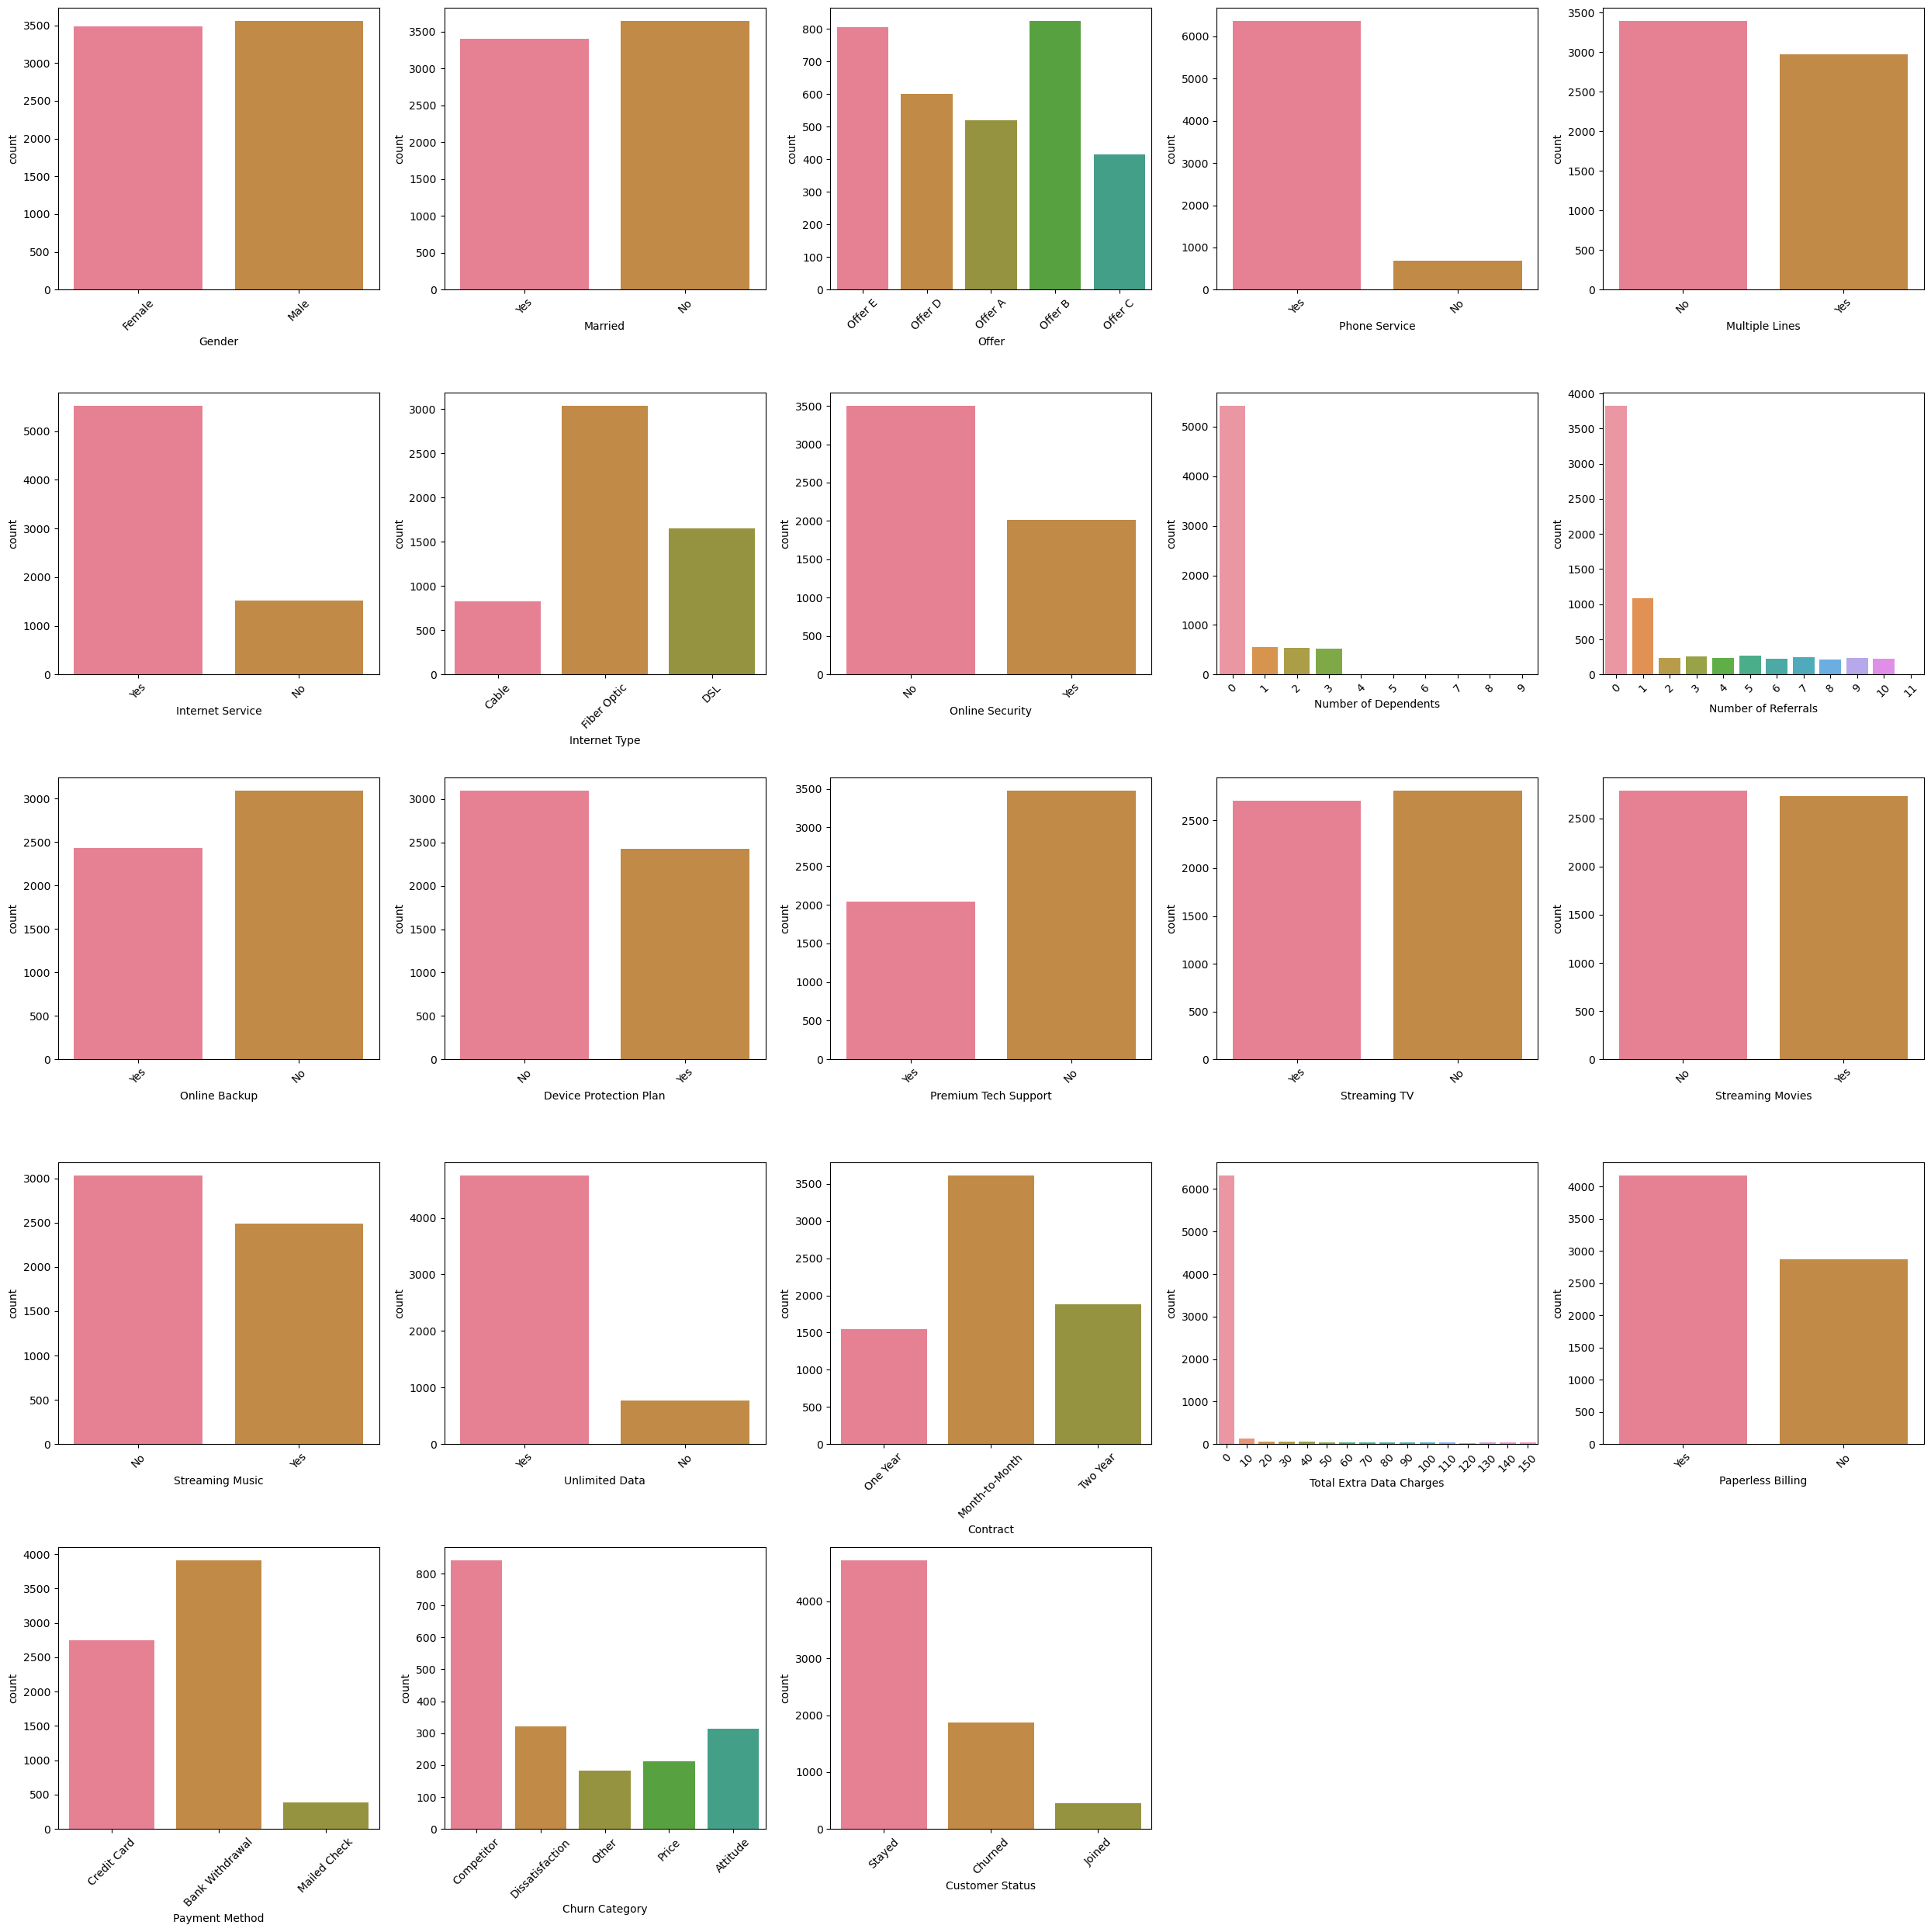

In [18]:
# Defining the number of rows and columns for the grid
num_cols = 5
num_rows = (len(Categorical.columns) - 2 + num_cols - 1) // num_cols  # Exclude 2 columns: "city" and "churn reason"
# Creating a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(5*num_cols, 5*num_rows))
# Flatten the axes array
axes = axes.flatten()
# Setting color palette
sns.set_palette("husl", 9)
# Columns to iterate over excluding "city" and "churn reason"
columns_to_plot = [col for col in Categorical.columns if col not in ["City", "Churn Reason"]]
# Iterating over each column in the DataFrame
for i, column in enumerate(columns_to_plot):
    ax = axes[i]  # Get the subplot axes
    sns.countplot(x=column, data=Categorical, ax=ax)
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
# Remove empty subplots
for i in range(len(columns_to_plot), num_rows * num_cols):
    fig.delaxes(axes[i])
# Adjust layout
plt.tight_layout()
# Save image to include in PDF
plt.savefig('Distribution_of_Categorical_Feature.jpg')  
# Show the plot
plt.show()

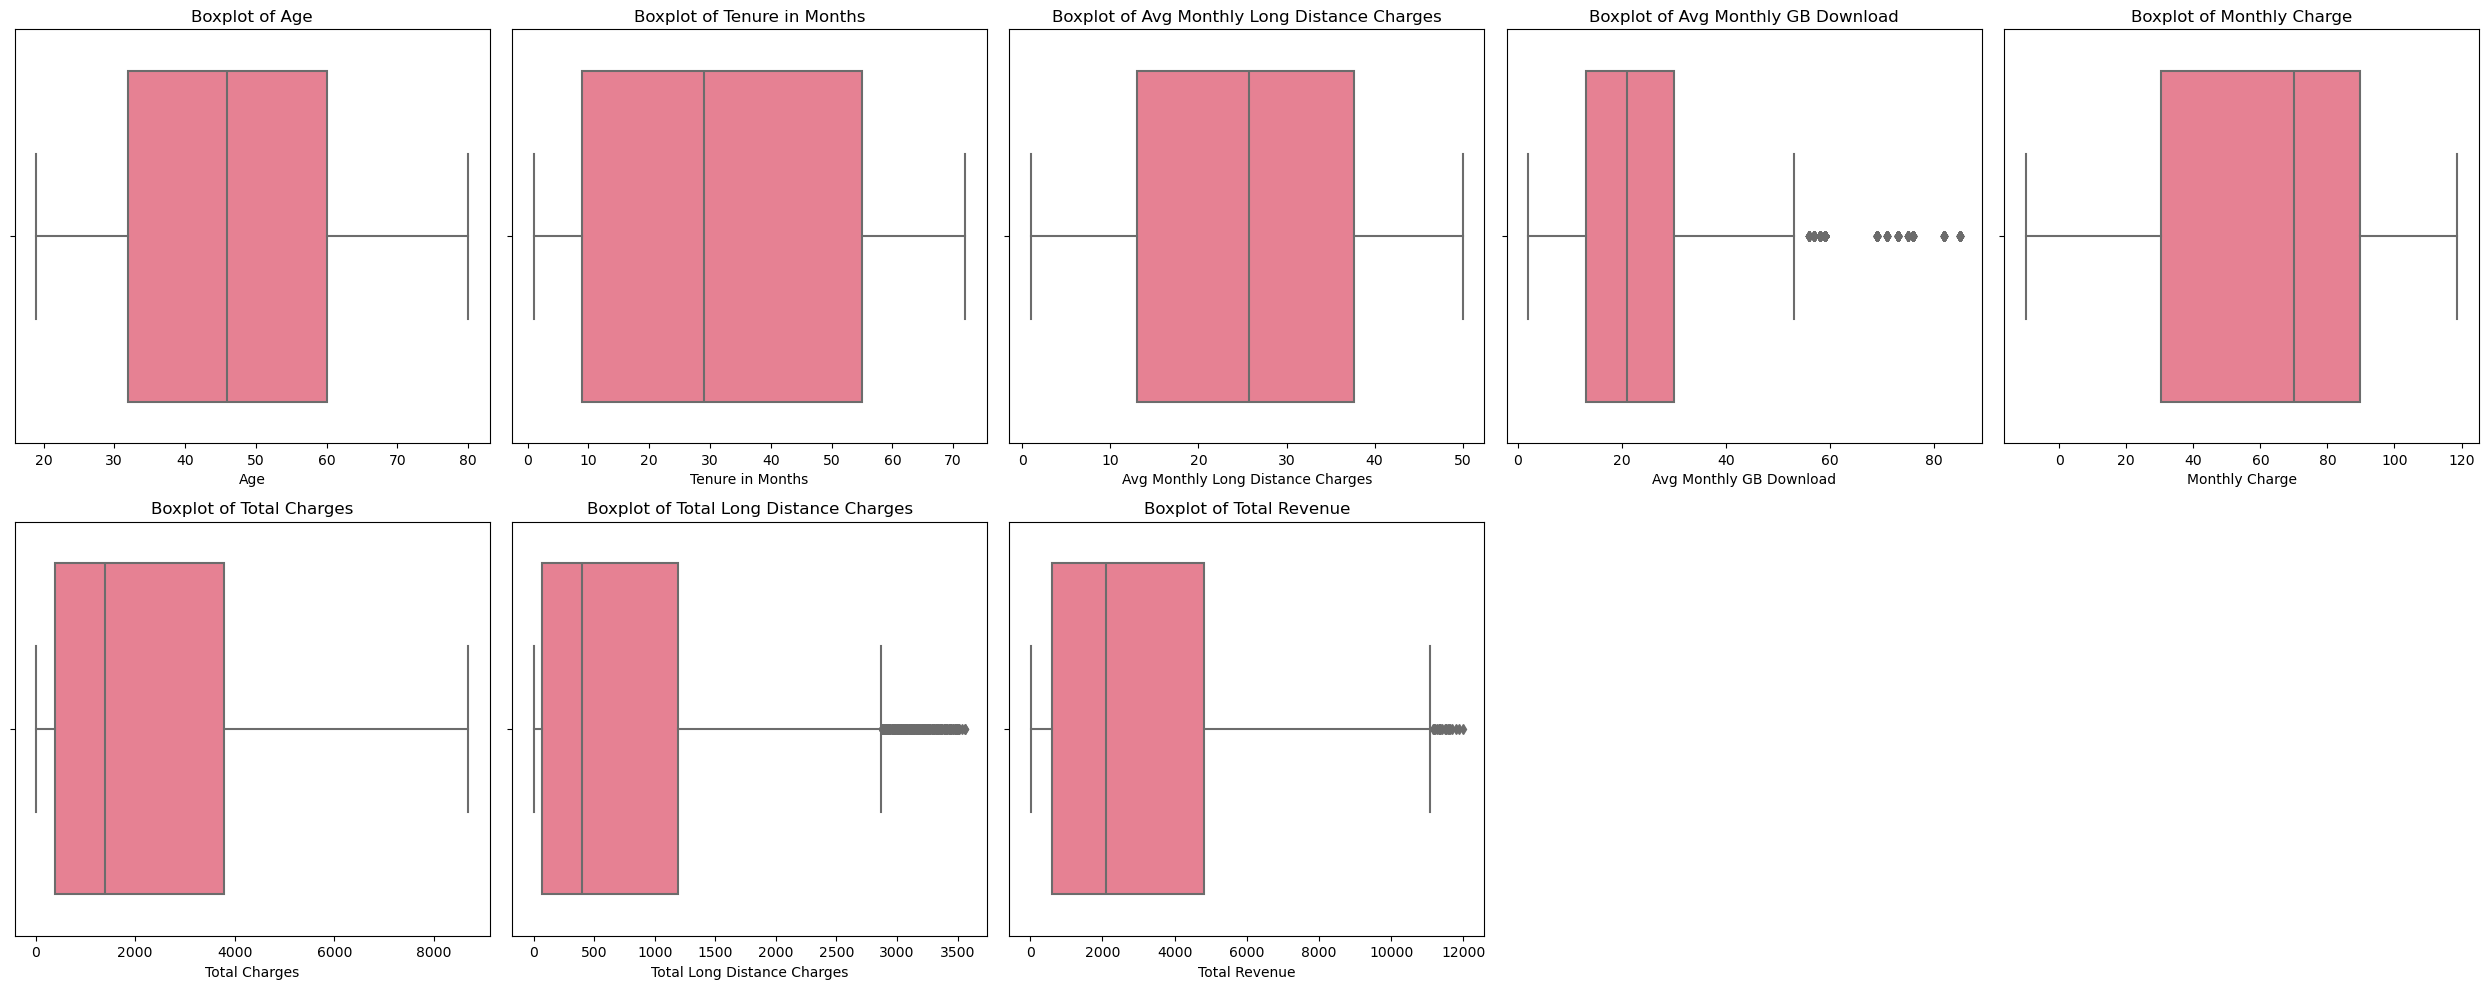

In [19]:
# Setting color palette
sns.set_palette("husl", 9)
# Defining the number of rows and columns for the grid
num_cols = 5
num_rows = (len(Numerical.columns) + num_cols - 1) // num_cols
# Creating a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(5*num_cols, 5*num_rows))
# Flatten the axes array
axes = axes.flatten()
# Columns to iterate over excluding "Total Refunds"
columns_to_plot = [col for col in Numerical.columns if col != "Total Refunds"]
# Iterating over each column in the DataFrame
for i, column in enumerate(columns_to_plot):
    ax = axes[i]  # Get the subplot axes
    # Plot boxplot for numerical columns
    sns.boxplot(x=column, data=Numerical, ax=ax)
    ax.set_title(f"Boxplot of {column}")
# Remove empty subplots
for i in range(len(columns_to_plot), num_rows * num_cols):
    fig.delaxes(axes[i])
# Adjust layout
plt.tight_layout()
# Save image to include in PDF
plt.savefig('Boxplot_of_each_Numerical_Feature.jpg')  
plt.show()

## Removing Joined from Target Variables


The joined observation would be removed from the target variable because the aim of the analysis is to predict telecom customer churn & not whether new customer joined. To predict the customer churn we would be using the "Stayed" or "churned"

In [20]:
Churn = Churn[Churn['Customer Status'] != 'Joined']

In [21]:
print(Churn['Customer Status'])

0        Stayed
1        Stayed
2       Churned
3       Churned
4       Churned
         ...   
7037    Churned
7038     Stayed
7039    Churned
7041     Stayed
7042     Stayed
Name: Customer Status, Length: 6589, dtype: object


## Visualising relationship between features and target variables

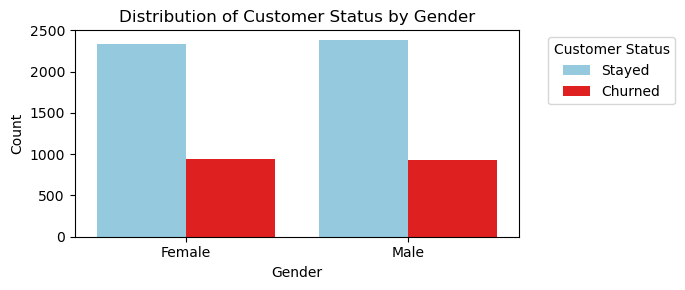

In [22]:
# Distribution of Customer Status by Gender
# Setting Colour Pallete
colour = ['skyblue','red']
sns.set_palette(colour)
# Creating a new figure and subplot
plt.figure(figsize=(7, 3))  
sns.countplot(x="Gender", hue="Customer Status", data=Churn)
# Adding titles and labels
plt.title("Distribution of Customer Status by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title='Customer Status', loc='upper left', bbox_to_anchor=(1.05, 1))
# Adjust layout
plt.tight_layout()
plt.savefig('Distribution of Customer Status by Gender.jpg') 
plt.show()

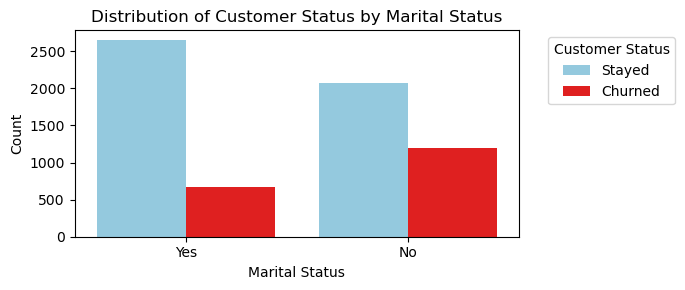

In [23]:
# Distribution of Customer Status by Married
# Setting Colour Pallete
colour = ['skyblue','red']
sns.set_palette(colour)
# Creating a new figure and subplot
plt.figure(figsize=(7, 3))  
sns.countplot(x="Married", hue="Customer Status", data=Churn)
# Adding titles and labels
plt.title("Distribution of Customer Status by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.legend(title='Customer Status', loc='upper left', bbox_to_anchor=(1.05, 1))
# Adjust layout
plt.tight_layout()
plt.savefig('Distribution of Customer Status by Marital Status.jpg') 
plt.show()

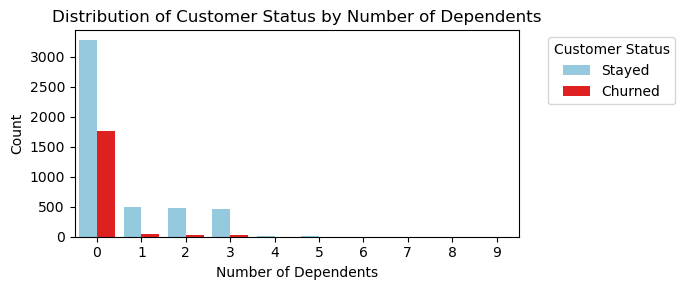

In [24]:
# Distribution of Customer Status by Number of Dependents
# Setting Colour Pallete
colour = ['skyblue','red']
sns.set_palette(colour)
# Creating a new figure and subplot
plt.figure(figsize=(7, 3))  
sns.countplot(x="Number of Dependents", hue="Customer Status", data=Churn)
# Adding titles and labels
plt.title("Distribution of Customer Status by Number of Dependents")
plt.xlabel("Number of Dependents")
plt.ylabel("Count")
plt.legend(title='Customer Status', loc='upper left', bbox_to_anchor=(1.05, 1))
# Adjust layout
plt.tight_layout()
plt.savefig('Distribution of Customer Status by Number of Dependents.jpg') 
plt.show()

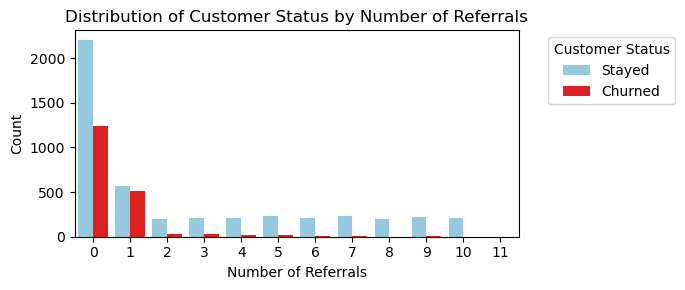

In [25]:
# Distribution of Customer Status by Number of Referrals
# Setting Colour Pallete
colour = ['skyblue','red']
sns.set_palette(colour)
# Creating a new figure and subplot
plt.figure(figsize=(7, 3))  
sns.countplot(x="Number of Referrals", hue="Customer Status", data=Churn)
# Adding titles and labels
plt.title("Distribution of Customer Status by Number of Referrals")
plt.xlabel("Number of Referrals")
plt.ylabel("Count")
plt.legend(title='Customer Status', loc='upper left', bbox_to_anchor=(1.05, 1))
# Adjust layout
plt.tight_layout()
plt.savefig('Distribution of Customer Status by Number of Referrals.jpg') 
plt.show()

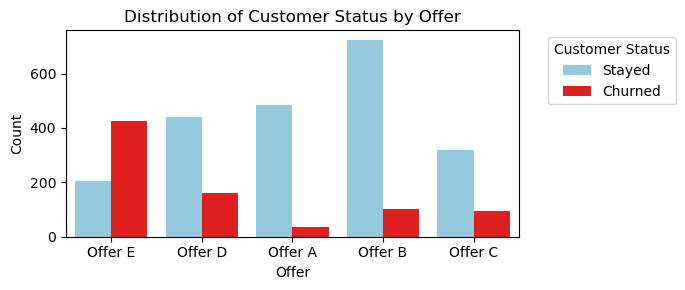

In [26]:
# Distribution of Customer Status by Offer
# Setting Colour Pallete
colour = ['skyblue','red']
sns.set_palette(colour)
# Creating a new figure and subplot
plt.figure(figsize=(7, 3))  
sns.countplot(x="Offer", hue="Customer Status", data=Churn)
# Adding titles and labels
plt.title("Distribution of Customer Status by Offer")
plt.xlabel("Offer")
plt.ylabel("Count")
plt.legend(title='Customer Status', loc='upper left', bbox_to_anchor=(1.05, 1))
# Adjust layout
plt.tight_layout()
plt.savefig('Distribution of Customer Status by Offer.jpg') 
plt.show()

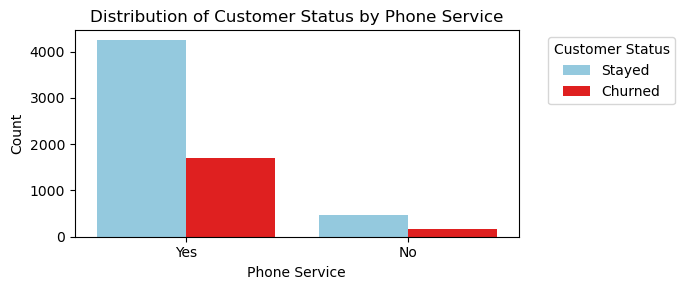

In [27]:
# Distribution of Customer Status by Phone Service
# Setting Colour Pallete
colour = ['skyblue','red']
sns.set_palette(colour)
# Creating a new figure and subplot
plt.figure(figsize=(7, 3))  
sns.countplot(x="Phone Service", hue="Customer Status", data=Churn)
# Adding titles and labels
plt.title("Distribution of Customer Status by Phone Service")
plt.xlabel("Phone Service")
plt.ylabel("Count")
plt.legend(title='Customer Status', loc='upper left', bbox_to_anchor=(1.05, 1))
# Adjust layout
plt.tight_layout()
plt.savefig('Distribution of Customer Status by Phone Service.jpg') 
plt.show()

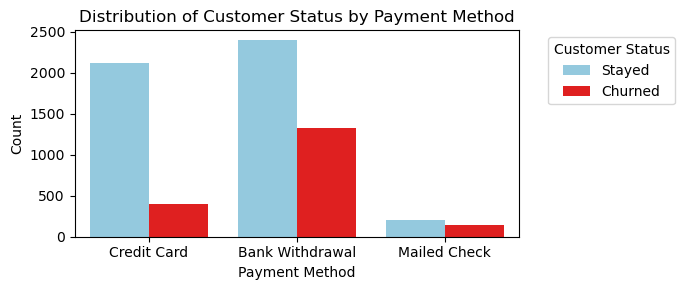

In [28]:
# Distribution of Customer Status by Payment Method
# Setting Colour Pallete
colour = ['skyblue','red']
sns.set_palette(colour)
# Creating a new figure and subplot
plt.figure(figsize=(7, 3))  
sns.countplot(x="Payment Method", hue="Customer Status", data=Churn)
# Adding titles and labels
plt.title("Distribution of Customer Status by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.legend(title='Customer Status', loc='upper left', bbox_to_anchor=(1.05, 1))
# Adjust layout
plt.tight_layout()
plt.savefig('Distribution of Customer Status by Payment Method.jpg') 
plt.show()

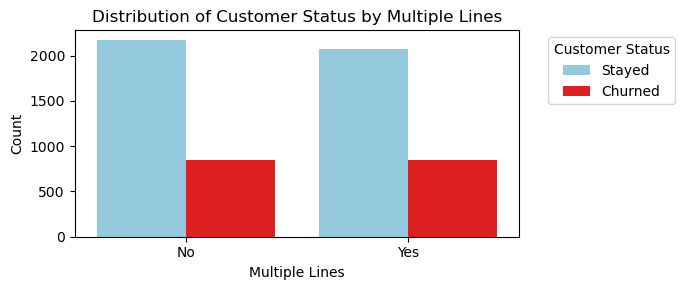

In [29]:
# Distribution of Customer Status by Multiple Lines
# Setting Colour Pallete
colour = ['skyblue','red']
sns.set_palette(colour)
# Creating a new figure and subplot
plt.figure(figsize=(7, 3))  
sns.countplot(x="Multiple Lines", hue="Customer Status", data=Churn)
# Adding titles and labels
plt.title("Distribution of Customer Status by Multiple Lines")
plt.xlabel("Multiple Lines")
plt.ylabel("Count")
plt.legend(title='Customer Status', loc='upper left', bbox_to_anchor=(1.05, 1))
# Adjust layout
plt.tight_layout()
plt.savefig('Distribution of Customer Status by Multiple Lines.jpg') 
plt.show()

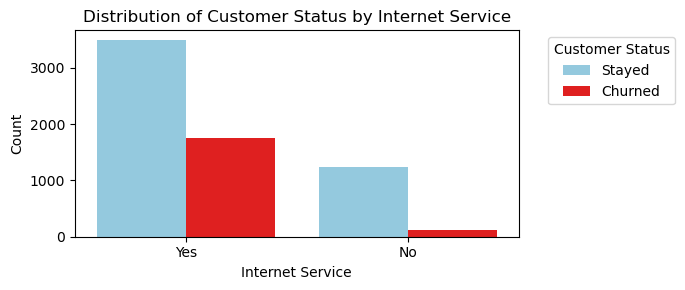

In [30]:
# Distribution of Customer Status by Internet Service
# Setting Colour Pallete
colour = ['skyblue','red']
sns.set_palette(colour)
# Creating a new figure and subplot
plt.figure(figsize=(7, 3))  
sns.countplot(x="Internet Service", hue="Customer Status", data=Churn)
# Adding titles and labels
plt.title("Distribution of Customer Status by Internet Service")
plt.xlabel("Internet Service")
plt.ylabel("Count")
plt.legend(title='Customer Status', loc='upper left', bbox_to_anchor=(1.05, 1))
# Adjust layout
plt.tight_layout()
plt.savefig('Distribution of Customer Status by Internet Service.jpg') 
plt.show()

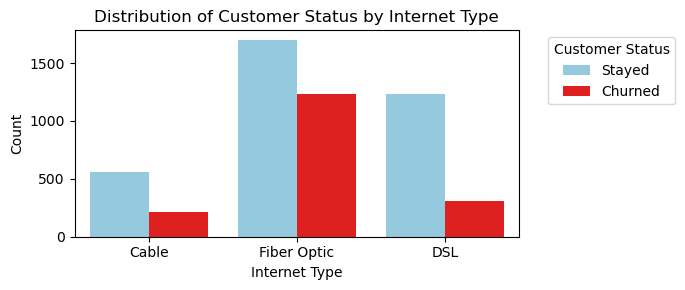

In [31]:
# Distribution of Customer Status by Internet Type
# Setting Colour Pallete
colour = ['skyblue','red']
sns.set_palette(colour)
# Creating a new figure and subplot
plt.figure(figsize=(7, 3))  
sns.countplot(x="Internet Type", hue="Customer Status", data=Churn)
# Adding titles and labels
plt.title("Distribution of Customer Status by Internet Type")
plt.xlabel("Internet Type")
plt.ylabel("Count")
plt.legend(title='Customer Status', loc='upper left', bbox_to_anchor=(1.05, 1))
# Adjust layout
plt.tight_layout()
plt.savefig('Distribution of Customer Status by Internet Type.jpg') 
plt.show()

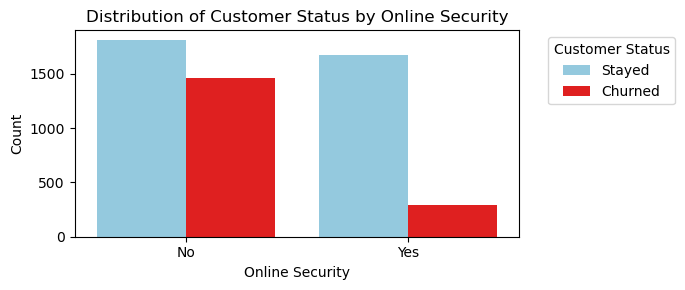

In [32]:
# Distribution of Customer Status by Online Security
# Setting Colour Pallete
colour = ['skyblue','red']
sns.set_palette(colour)
# Creating a new figure and subplot
plt.figure(figsize=(7, 3))  
sns.countplot(x="Online Security", hue="Customer Status", data=Churn)
# Adding titles and labels
plt.title("Distribution of Customer Status by Online Security")
plt.xlabel("Online Security")
plt.ylabel("Count")
plt.legend(title='Customer Status', loc='upper left', bbox_to_anchor=(1.05, 1))
# Adjust layout
plt.tight_layout()
plt.savefig('Distribution of Customer Status by Online Security.jpg') 
plt.show()

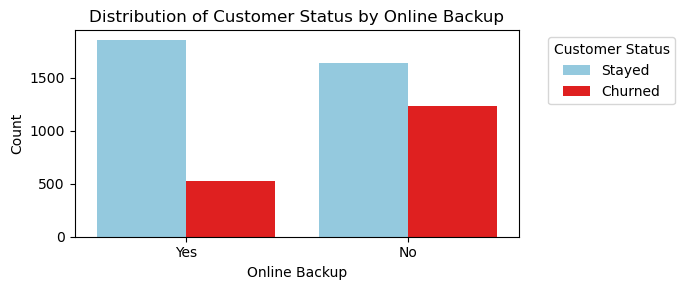

In [33]:
# Distribution of Customer Status by Online Backup
# Setting Colour Pallete
colour = ['skyblue','red']
sns.set_palette(colour)
# Creating a new figure and subplot
plt.figure(figsize=(7, 3))  
sns.countplot(x="Online Backup", hue="Customer Status", data=Churn)
# Adding titles and labels
plt.title("Distribution of Customer Status by Online Backup")
plt.xlabel("Online Backup")
plt.ylabel("Count")
plt.legend(title='Customer Status', loc='upper left', bbox_to_anchor=(1.05, 1))
# Adjust layout
plt.tight_layout()
plt.savefig('Distribution of Customer Status by Online Backup.jpg') 
plt.show()

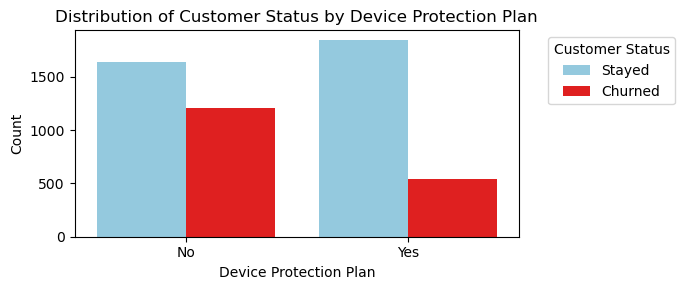

In [34]:
# Distribution of Customer Status by Device Protection Plan
# Setting Colour Pallete
colour = ['skyblue','red']
sns.set_palette(colour)
# Creating a new figure and subplot
plt.figure(figsize=(7, 3))  
sns.countplot(x="Device Protection Plan", hue="Customer Status", data=Churn)
# Adding titles and labels
plt.title("Distribution of Customer Status by Device Protection Plan")
plt.xlabel("Device Protection Plan")
plt.ylabel("Count")
plt.legend(title='Customer Status', loc='upper left', bbox_to_anchor=(1.05, 1))
# Adjust layout
plt.tight_layout()
plt.savefig('Distribution of Customer Status by Device Protection Plan.jpg') 
plt.show()

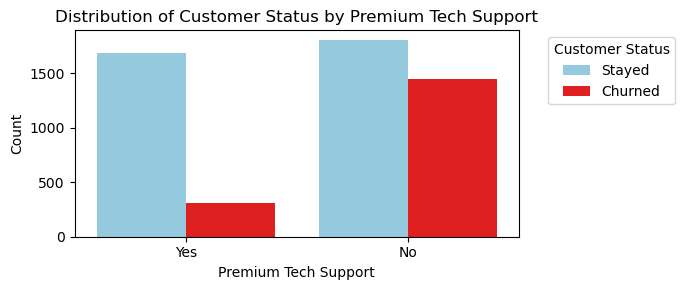

In [35]:
# Distribution of Customer Status by Premium Tech Support
# Setting Colour Pallete
colour = ['skyblue','red']
sns.set_palette(colour)
# Creating a new figure and subplot
plt.figure(figsize=(7, 3))  
sns.countplot(x="Premium Tech Support", hue="Customer Status", data=Churn)
# Adding titles and labels
plt.title("Distribution of Customer Status by Premium Tech Support")
plt.xlabel("Premium Tech Support")
plt.ylabel("Count")
plt.legend(title='Customer Status', loc='upper left', bbox_to_anchor=(1.05, 1))
# Adjust layout
plt.tight_layout()
plt.savefig('Distribution of Customer Status by Premium Tech Support.jpg') 
plt.show()

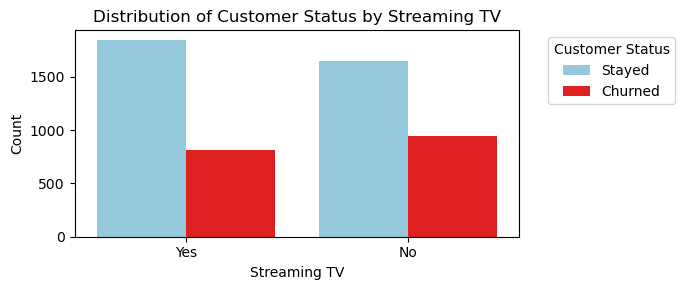

In [36]:
# Distribution of Customer Status by Streaming TV
# Setting Colour Pallete
colour = ['skyblue','red']
sns.set_palette(colour)
# Creating a new figure and subplot
plt.figure(figsize=(7, 3))  
sns.countplot(x="Streaming TV", hue="Customer Status", data=Churn)
# Adding titles and labels
plt.title("Distribution of Customer Status by Streaming TV")
plt.xlabel("Streaming TV")
plt.ylabel("Count")
plt.legend(title='Customer Status', loc='upper left', bbox_to_anchor=(1.05, 1))
# Adjust layout
plt.tight_layout()
plt.savefig('Distribution of Customer Status by Streaming TV.jpg') 
plt.show()

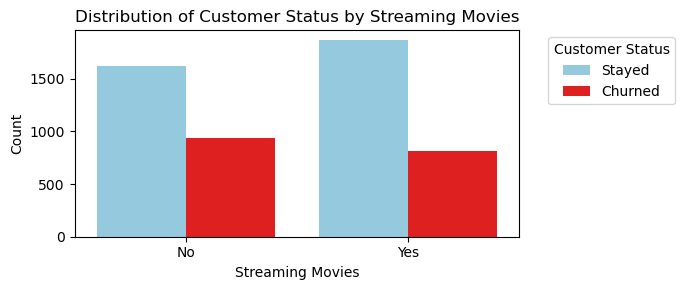

In [37]:
# Distribution of Customer Status by Streaming Movies
# Setting Colour Pallete
colour = ['skyblue','red']
sns.set_palette(colour)
# Creating a new figure and subplot
plt.figure(figsize=(7, 3))  
sns.countplot(x="Streaming Movies", hue="Customer Status", data=Churn)
# Adding titles and labels
plt.title("Distribution of Customer Status by Streaming Movies")
plt.xlabel("Streaming Movies")
plt.ylabel("Count")
plt.legend(title='Customer Status', loc='upper left', bbox_to_anchor=(1.05, 1))
# Adjust layout
plt.tight_layout()
plt.savefig('Distribution of Customer Status by Streaming Movies.jpg') 
plt.show()

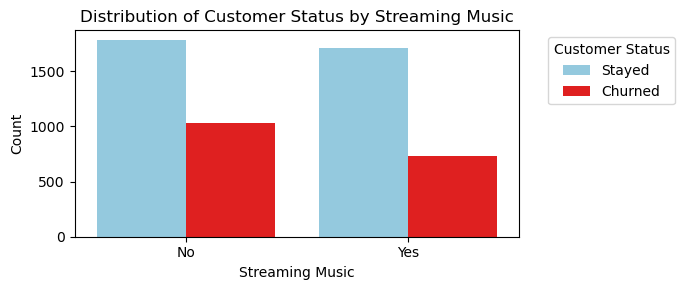

In [38]:
# Distribution of Customer Status by Streaming Musics
# Setting Colour Pallete
colour = ['skyblue','red']
sns.set_palette(colour)
# Creating a new figure and subplot
plt.figure(figsize=(7, 3))  
sns.countplot(x="Streaming Music", hue="Customer Status", data=Churn)
# Adding titles and labels
plt.title("Distribution of Customer Status by Streaming Music")
plt.xlabel("Streaming Music")
plt.ylabel("Count")
plt.legend(title='Customer Status', loc='upper left', bbox_to_anchor=(1.05, 1))
# Adjust layout
plt.tight_layout()
plt.savefig('Distribution of Customer Status by Streaming Music.jpg') 
plt.show()

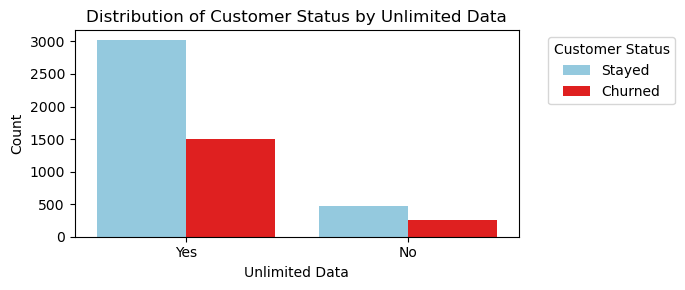

In [39]:
# Distribution of Customer Status by Unlimited Data
# Setting Colour Pallete
colour = ['skyblue','red']
sns.set_palette(colour)
# Creating a new figure and subplot
plt.figure(figsize=(7, 3))  
sns.countplot(x="Unlimited Data", hue="Customer Status", data=Churn)
# Adding titles and labels
plt.title("Distribution of Customer Status by Unlimited Data")
plt.xlabel("Unlimited Data")
plt.ylabel("Count")
plt.legend(title='Customer Status', loc='upper left', bbox_to_anchor=(1.05, 1))
# Adjust layout
plt.tight_layout()
plt.savefig('Distribution of Customer Status by Unlimited Data.jpg') 
plt.show()

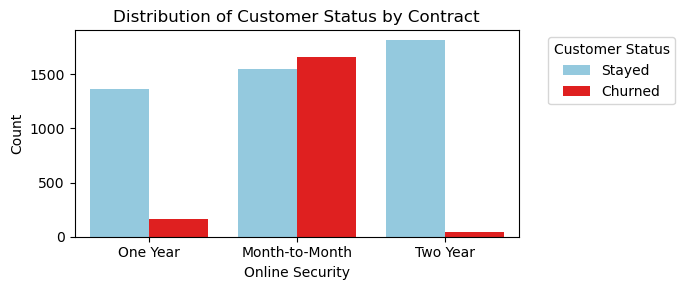

In [40]:
# Distribution of Customer Status by Contract
# Setting Colour Pallete
colour = ['skyblue','red']
sns.set_palette(colour)
# Creating a new figure and subplot
plt.figure(figsize=(7, 3))  
sns.countplot(x="Contract", hue="Customer Status", data=Churn)
# Adding titles and labels
plt.title("Distribution of Customer Status by Contract")
plt.xlabel("Online Security")
plt.ylabel("Count")
plt.legend(title='Customer Status', loc='upper left', bbox_to_anchor=(1.05, 1))
# Adjust layout
plt.tight_layout()
plt.savefig('Distribution of Customer Status by Contract.jpg') 
plt.show()

In [41]:
# Group by city and churn status
city_churn_counts = Churn.groupby(['City', 'Customer Status']).size().unstack().reset_index()
city_churn_counts.fillna(0, inplace=True)  # Fill NaN values with 0 for cities with no churn data

# Create a map centered around a latitude and longitude
churn_map = folium.Map(location=[Churn['Latitude'].mean(), Churn['Longitude'].mean()], zoom_start=5)

# Add markers for each city
for index, row in city_churn_counts.iterrows():
    City = row['City']
    Churned = row['Churned'] if 'Churned' in row else 0
    Stayed = row['Stayed'] if 'Stayed' in row else 0
    marker_popup = f"{City}<br>Churned: {Churned}<br>Stayed: {Stayed}"
    folium.Marker(
        location=[Churn[Churn['City'] == City]['Latitude'].values[0], Churn[Churn['City'] == City]['Longitude'].values[0]],
        popup=marker_popup,
        icon=folium.Icon(color='red' if Churned > Stayed else 'green')
    ).add_to(churn_map)

# Add a tooltip to show city name and churned/stayed count when hovering over a marker
folium.Marker(
    location=[0, 0],  # Dummy location
    icon=None,
    tooltip=folium.Tooltip("<b>Click a marker to see details</b>")
).add_to(churn_map)

# Display the map
churn_map

# Data Cleaning

## Removing Unnecessary Columns

In [42]:
#Removing unnecessary Columns
Churn.drop(["Customer ID", "Zip Code", "City", "Latitude", "Longitude", "Churn Reason", "Churn Category"], axis =1, inplace= True)

In [43]:
# Checking head of dataset after removing columns
Churn.head(n=30)

Gender  Age Married  Number of Dependents  Number of Referrals  \
0   Female   37     Yes                     0                    2   
1     Male   46      No                     0                    0   
2     Male   50      No                     0                    0   
3     Male   78     Yes                     0                    1   
4   Female   75     Yes                     0                    3   
5   Female   23      No                     3                    0   
6   Female   67     Yes                     0                    1   
7     Male   52     Yes                     0                    8   
8   Female   68      No                     0                    0   
9   Female   43     Yes                     1                    3   
10    Male   47      No                     0                    0   
11  Female   25     Yes                     2                    2   
12  Female   58     Yes                     0                    0   
13  Female   32      No                     0                    0   
14  Female   39      No                     0                    0   
15  Female   58     Yes                     2                    9   
16  Female   52     Yes                     1                    0   
18    Male   79      No                     0                    0   
19    Male   67      No                     0                    0   
20  Female   79     Yes                     0                    0   
21  Female   26     Yes                     0                    1   
22  Female   30     Yes                     2                    1   
24  Female   34     Yes                     0                    0   
25  Female   37     Yes                     1                    1   
26  Female   37     Yes                     3                   10   
27    Male   42     Yes                     3                    3   
28    Male   64      No                     0                    0   
29  Female   47     Yes                     3                    5   
30    Male   23     Yes                     3                    1   
31  Female   48     Yes                     0                    5   

    Tenure in Months    Offer Phone Service  \
0                  9      NaN           Yes   
1                  9      NaN           Yes   
2                  4  Offer E           Yes   
3                 13  Offer D           Yes   
4                  3      NaN           Yes   
5                  9  Offer E           Yes   
6                 71  Offer A           Yes   
7                 63  Offer B           Yes   
8                  7  Offer E           Yes   
9                 65      NaN           Yes   
10                54      NaN            No   
11                72      NaN           Yes   
12                 5      NaN           Yes   
13                72  Offer A           Yes   
14                56      NaN            No   
15                71  Offer A           Yes   
16                34      NaN            No   
18                45      NaN           Yes   
19                 1      NaN            No   
20                50      NaN           Yes   
21                13      NaN           Yes   
22                23  Offer D           Yes   
24                 4  Offer E           Yes   
25                 1      NaN            No   
26                55      NaN           Yes   
27                54      NaN           Yes   
28                26  Offer C           Yes   
29                69      NaN           Yes   
30                37  Offer C           Yes   
31                49  Offer B           Yes   

    Avg Monthly Long Distance Charges Multiple Lines  ...        Contract  \
0                               42.39             No  ...        One Year   
1                               10.69            Yes  ...  Month-to-Month   
2                               33.65             No  ...  Month-to-Month   
3                               27.82             No  ...  Month-to

In [44]:
# Finding Unique values in each columns after Cleaning

for i in Churn.columns:
    print("*************************************************",i,"************************************************************")
    print()
    print(set(Churn[i].tolist()))
    print()

************************************************* Gender ************************************************************

{'Female', 'Male'}

************************************************* Age ************************************************************

{19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80}

************************************************* Married ************************************************************

{'No', 'Yes'}

************************************************* Number of Dependents ************************************************************

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

************************************************* Number of Referrals ************************************************************

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}

***********************

## Checking for Null in Columns and replacing with median and mode

In [45]:
#Checking number of null in each column
Churn.isnull().sum()

Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3598
Phone Service                           0
Avg Monthly Long Distance Charges     644
Multiple Lines                        644
Internet Service                        0
Internet Type                        1344
Avg Monthly GB Download              1344
Online Security                      1344
Online Backup                        1344
Device Protection Plan               1344
Premium Tech Support                 1344
Streaming TV                         1344
Streaming Movies                     1344
Streaming Music                      1344
Unlimited Data                       1344
Contract                                0
Paperless Billing                       0
Payment Method                    

In [46]:
# Replacing missing values in numerical columns with the median
numerical_columns = ['Avg Monthly Long Distance Charges', 'Avg Monthly GB Download']
for column in numerical_columns:
    median_value = Churn[column].median()
    Churn[column].fillna(median_value, inplace=True)

In [47]:
# Replacing missing values in categorical columns with the mode
categorical_columns = ['Internet Type', 'Online Security', 'Multiple Lines', 'Internet Type', 'Online Security',
                       'Online Backup', 'Offer', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
                       'Streaming Music', 'Unlimited Data']  
for column in categorical_columns:
    mode_value = Churn[column].mode()[0]
    Churn[column].fillna(mode_value, inplace=True)


In [48]:
#Checking number of null in each column after replacing missing values
Churn.isnull().sum()

Gender                               0
Age                                  0
Married                              0
Number of Dependents                 0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                             0
Paperless Billing                    0
Payment Method                       0
Monthly Charge                       0
Total Charges            

In [49]:
# Checking head of dataset after replacing NaN Values
Churn.head(n=30)

Gender  Age Married  Number of Dependents  Number of Referrals  \
0   Female   37     Yes                     0                    2   
1     Male   46      No                     0                    0   
2     Male   50      No                     0                    0   
3     Male   78     Yes                     0                    1   
4   Female   75     Yes                     0                    3   
5   Female   23      No                     3                    0   
6   Female   67     Yes                     0                    1   
7     Male   52     Yes                     0                    8   
8   Female   68      No                     0                    0   
9   Female   43     Yes                     1                    3   
10    Male   47      No                     0                    0   
11  Female   25     Yes                     2                    2   
12  Female   58     Yes                     0                    0   
13  Female   32      No                     0                    0   
14  Female   39      No                     0                    0   
15  Female   58     Yes                     2                    9   
16  Female   52     Yes                     1                    0   
18    Male   79      No                     0                    0   
19    Male   67      No                     0                    0   
20  Female   79     Yes                     0                    0   
21  Female   26     Yes                     0                    1   
22  Female   30     Yes                     2                    1   
24  Female   34     Yes                     0                    0   
25  Female   37     Yes                     1                    1   
26  Female   37     Yes                     3                   10   
27    Male   42     Yes                     3                    3   
28    Male   64      No                     0                    0   
29  Female   47     Yes                     3                    5   
30    Male   23     Yes                     3                    1   
31  Female   48     Yes                     0                    5   

    Tenure in Months    Offer Phone Service  \
0                  9  Offer B           Yes   
1                  9  Offer B           Yes   
2                  4  Offer E           Yes   
3                 13  Offer D           Yes   
4                  3  Offer B           Yes   
5                  9  Offer E           Yes   
6                 71  Offer A           Yes   
7                 63  Offer B           Yes   
8                  7  Offer E           Yes   
9                 65  Offer B           Yes   
10                54  Offer B            No   
11                72  Offer B           Yes   
12                 5  Offer B           Yes   
13                72  Offer A           Yes   
14                56  Offer B            No   
15                71  Offer A           Yes   
16                34  Offer B            No   
18                45  Offer B           Yes   
19                 1  Offer B            No   
20                50  Offer B           Yes   
21                13  Offer B           Yes   
22                23  Offer D           Yes   
24                 4  Offer E           Yes   
25                 1  Offer B            No   
26                55  Offer B           Yes   
27                54  Offer B           Yes   
28                26  Offer C           Yes   
29                69  Offer B           Yes   
30                37  Offer C           Yes   
31                49  Offer B           Yes   

    Avg Monthly Long Distance Charges Multiple Lines  ...        Contract  \
0                               42.39             No  ...        One Year   
1                               10.69            Yes  ...  Month-to-Month   
2                               33.65             No  ...  Month-to-Month   
3                               27.82             No  ...  Month-to

## Encoding Categorical Features

In [50]:
# Checking data types before encoding
Churn.dtypes

Gender                                object
Age                                    int64
Married                               object
Number of Dependents                   int64
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Internet Type                         object
Avg Monthly GB Download              float64
Online Security                       object
Online Backup                         object
Device Protection Plan                object
Premium Tech Support                  object
Streaming TV                          object
Streaming Movies                      object
Streaming Music                       object
Unlimited Data                        object
Contract                              object
Paperless 

In [51]:
# Convert categorical columns to numerical
categorical_columns = Churn.select_dtypes(include=['object']).columns
# Convert categorical columns to numerical using Label Encoding
for column in categorical_columns:
    le = LabelEncoder()
    Churn[column] = le.fit_transform(Churn[column])


In [52]:
# Checking data types after encoding
Churn.dtypes

Gender                                 int32
Age                                    int64
Married                                int32
Number of Dependents                   int64
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                  int32
Phone Service                          int32
Avg Monthly Long Distance Charges    float64
Multiple Lines                         int32
Internet Service                       int32
Internet Type                          int32
Avg Monthly GB Download              float64
Online Security                        int32
Online Backup                          int32
Device Protection Plan                 int32
Premium Tech Support                   int32
Streaming TV                           int32
Streaming Movies                       int32
Streaming Music                        int32
Unlimited Data                         int32
Contract                               int32
Paperless 

In [53]:
# Checking head of dataset after Encoding
Churn.head(n=10)

Gender  Age  Married  Number of Dependents  Number of Referrals  \
0       0   37        1                     0                    2   
1       1   46        0                     0                    0   
2       1   50        0                     0                    0   
3       1   78        1                     0                    1   
4       0   75        1                     0                    3   
5       0   23        0                     3                    0   
6       0   67        1                     0                    1   
7       1   52        1                     0                    8   
8       0   68        0                     0                    0   
9       0   43        1                     1                    3   

   Tenure in Months  Offer  Phone Service  Avg Monthly Long Distance Charges  \
0                 9      1              1                              42.39   
1                 9      1              1                              10.69   
2                 4      4              1                              33.65   
3                13      3              1                              27.82   
4                 3      1              1                               7.38   
5                 9      4              1                              16.77   
6                71      0              1                               9.96   
7                63      1              1                              12.96   
8                 7      4              1                              10.53   
9                65      1              1                              28.46   

   Multiple Lines  ...  Contract  Paperless Billing  Payment Method  \
0               0  ...         1                  1               1   
1               1  ...         0                  0               1   
2               0  ...         0                  1               0   
3               0  ...         0                  1               0   
4               0  ...         0                  1               1   
5               0  ...         0                  1               1   
6               0  ...         2                  1               0   
7               1  ...         2                  1               1   
8               0  ...         2                  1               0   
9               1  ...         2                  1               1   

   Monthly Charge  Total Charges  Total Refunds  Total Extra Data Charges  \
0           65.60         593.30           0.00                         0   
1           -4.00         542.40          38.33                        10   
2           73.90         280.85           0.00                         0   
3           98.00        1237.85           0.00                         0   
4           83.90         267.40           0.00                         0   
5           69.40         571.45           0.00                         0   
6          109.70        7904.25           0.00                         0   
7           84.65        5377.80           0.00                        20   
8           48.20         340.35           0.00                         0   
9           90.45        5957.90           0.00                         0   

   Total Long Distance Charges  Total Revenue  Customer Status  
0                       381.51         974.81                1  
1                        96.21         610.28                1  
2                       134.60         415.45                0  
3                       361.66        1599.51                0  
4                        22.14         289.54                0  
5                       150.93         722.38                1  
6                       707.16        8611.41                1  
7                       816.48        6214.28                1  
8                        73.71         414.06                1  
9                      1849.90        7807.80                1  

[10 r

C:\Users\oluwa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\oluwa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\oluwa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\oluwa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

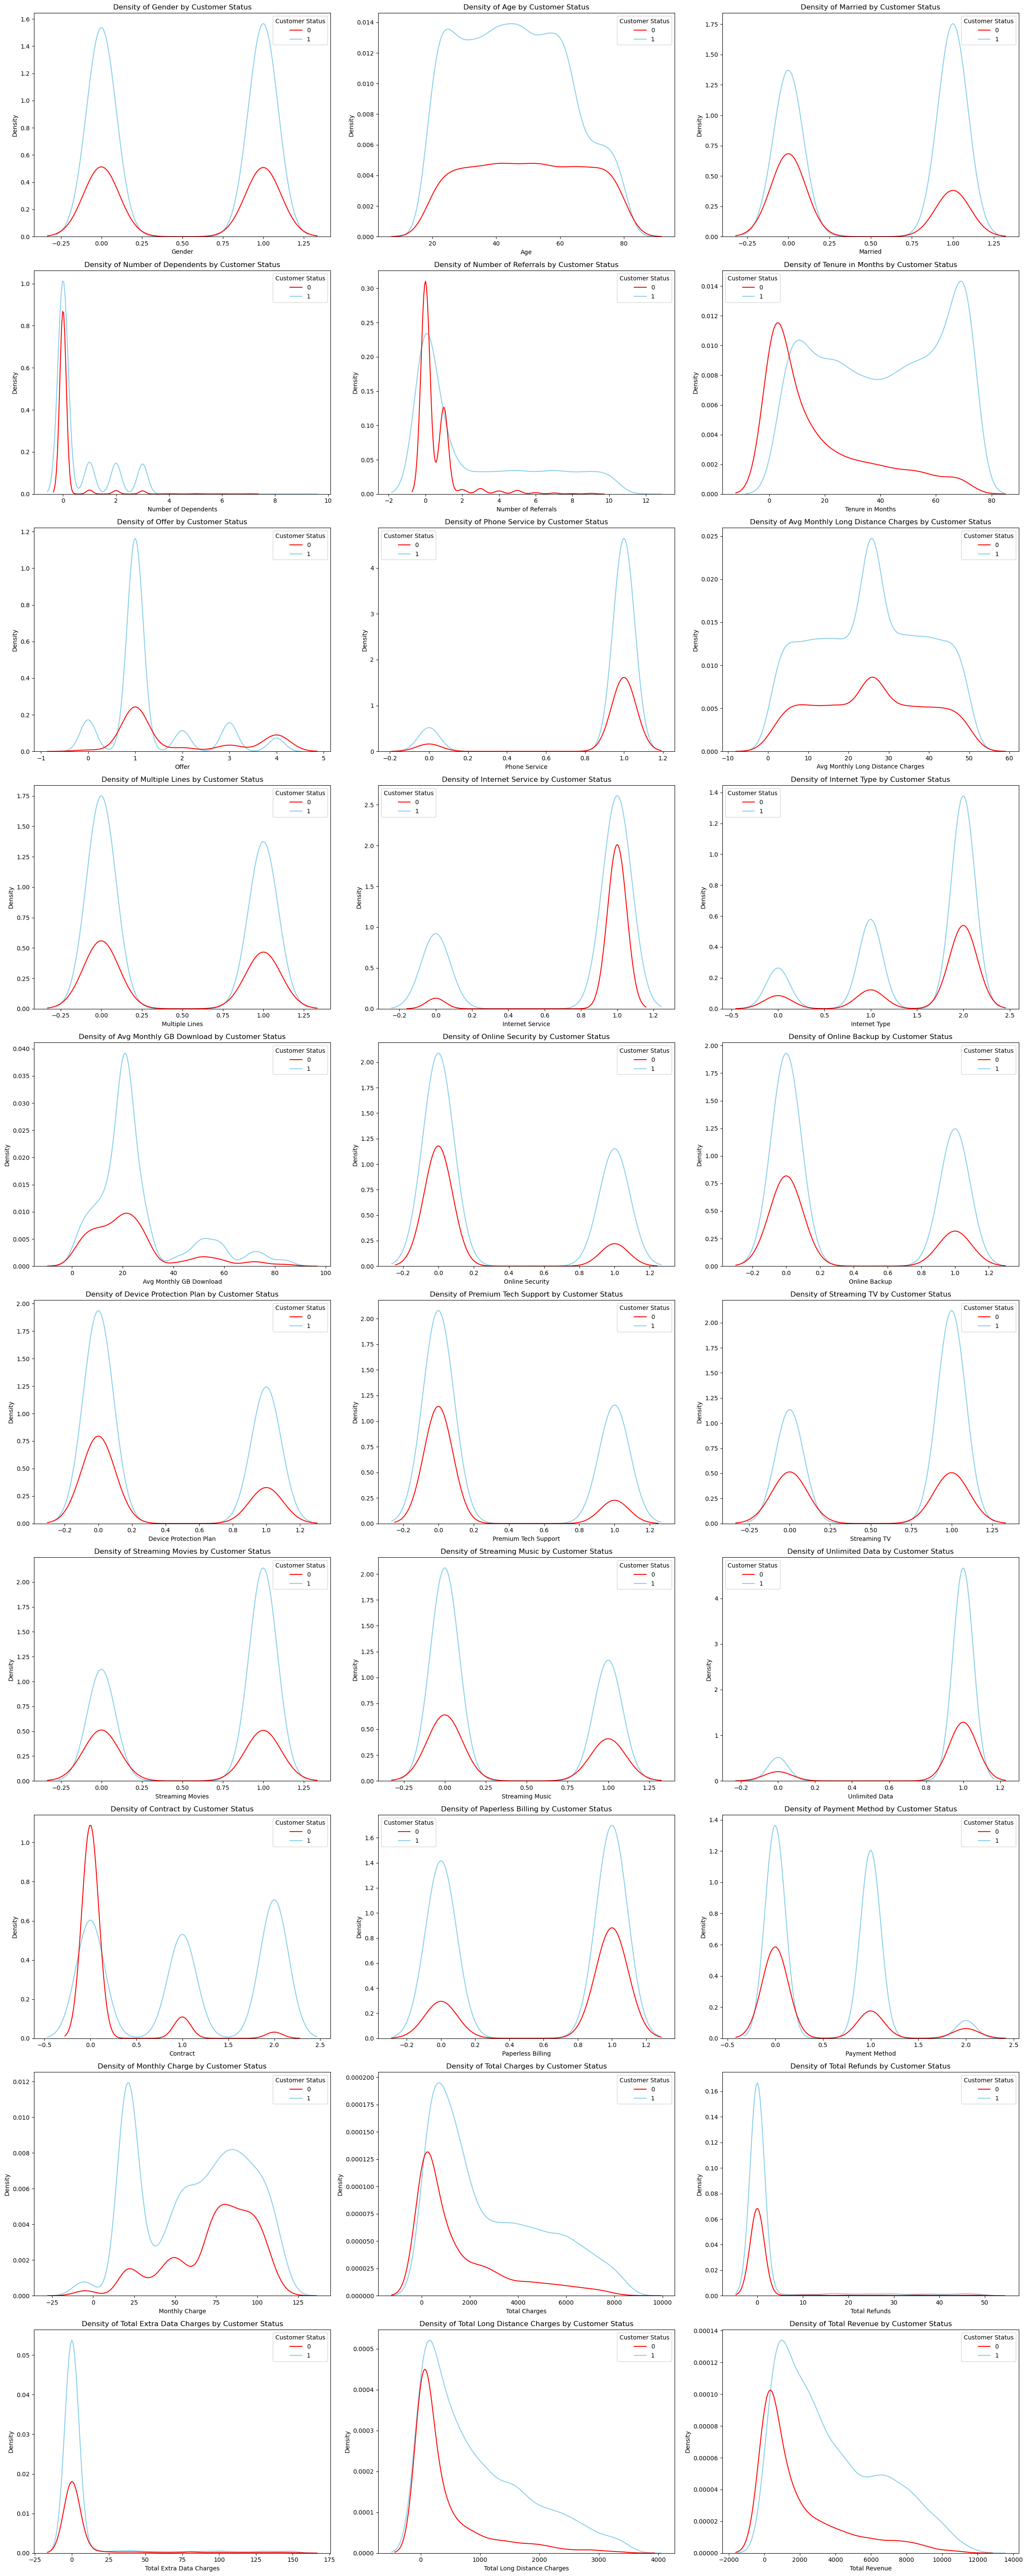

In [54]:
#Plotting the distribution of each feature with the target variable using density plot
# Setting Colour Pallete
colour = ['red','skyblue']
sns.set_palette(colour)
numerical_features = [col for col in Churn.columns if col != 'Customer Status']
# Defining the number of rows and columns for the grid
num_cols = 3
num_rows = (len(numerical_features) + num_cols - 1) // num_cols
# Creating a new figure outside of the loop
plt.figure(figsize=(8*num_cols, 6*num_rows))
# Plotting the distribution 
for i, feature in enumerate(numerical_features):
    # Create a new subplot
    ax = plt.subplot(num_rows, num_cols, i + 1)   
    # Plot density plot
    sns.kdeplot(x=feature, data=Churn, hue='Customer Status', ax=ax)   
    plt.title(f"Density of {feature} by Customer Status")
    plt.xlabel(feature)
    plt.ylabel('Density')      
# Adjust layout
plt.tight_layout()
plt.savefig('Distribution of feature with the target variable using Density Plot.jpg') 
plt.show()

C:\Users\oluwa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\oluwa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\oluwa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\oluwa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

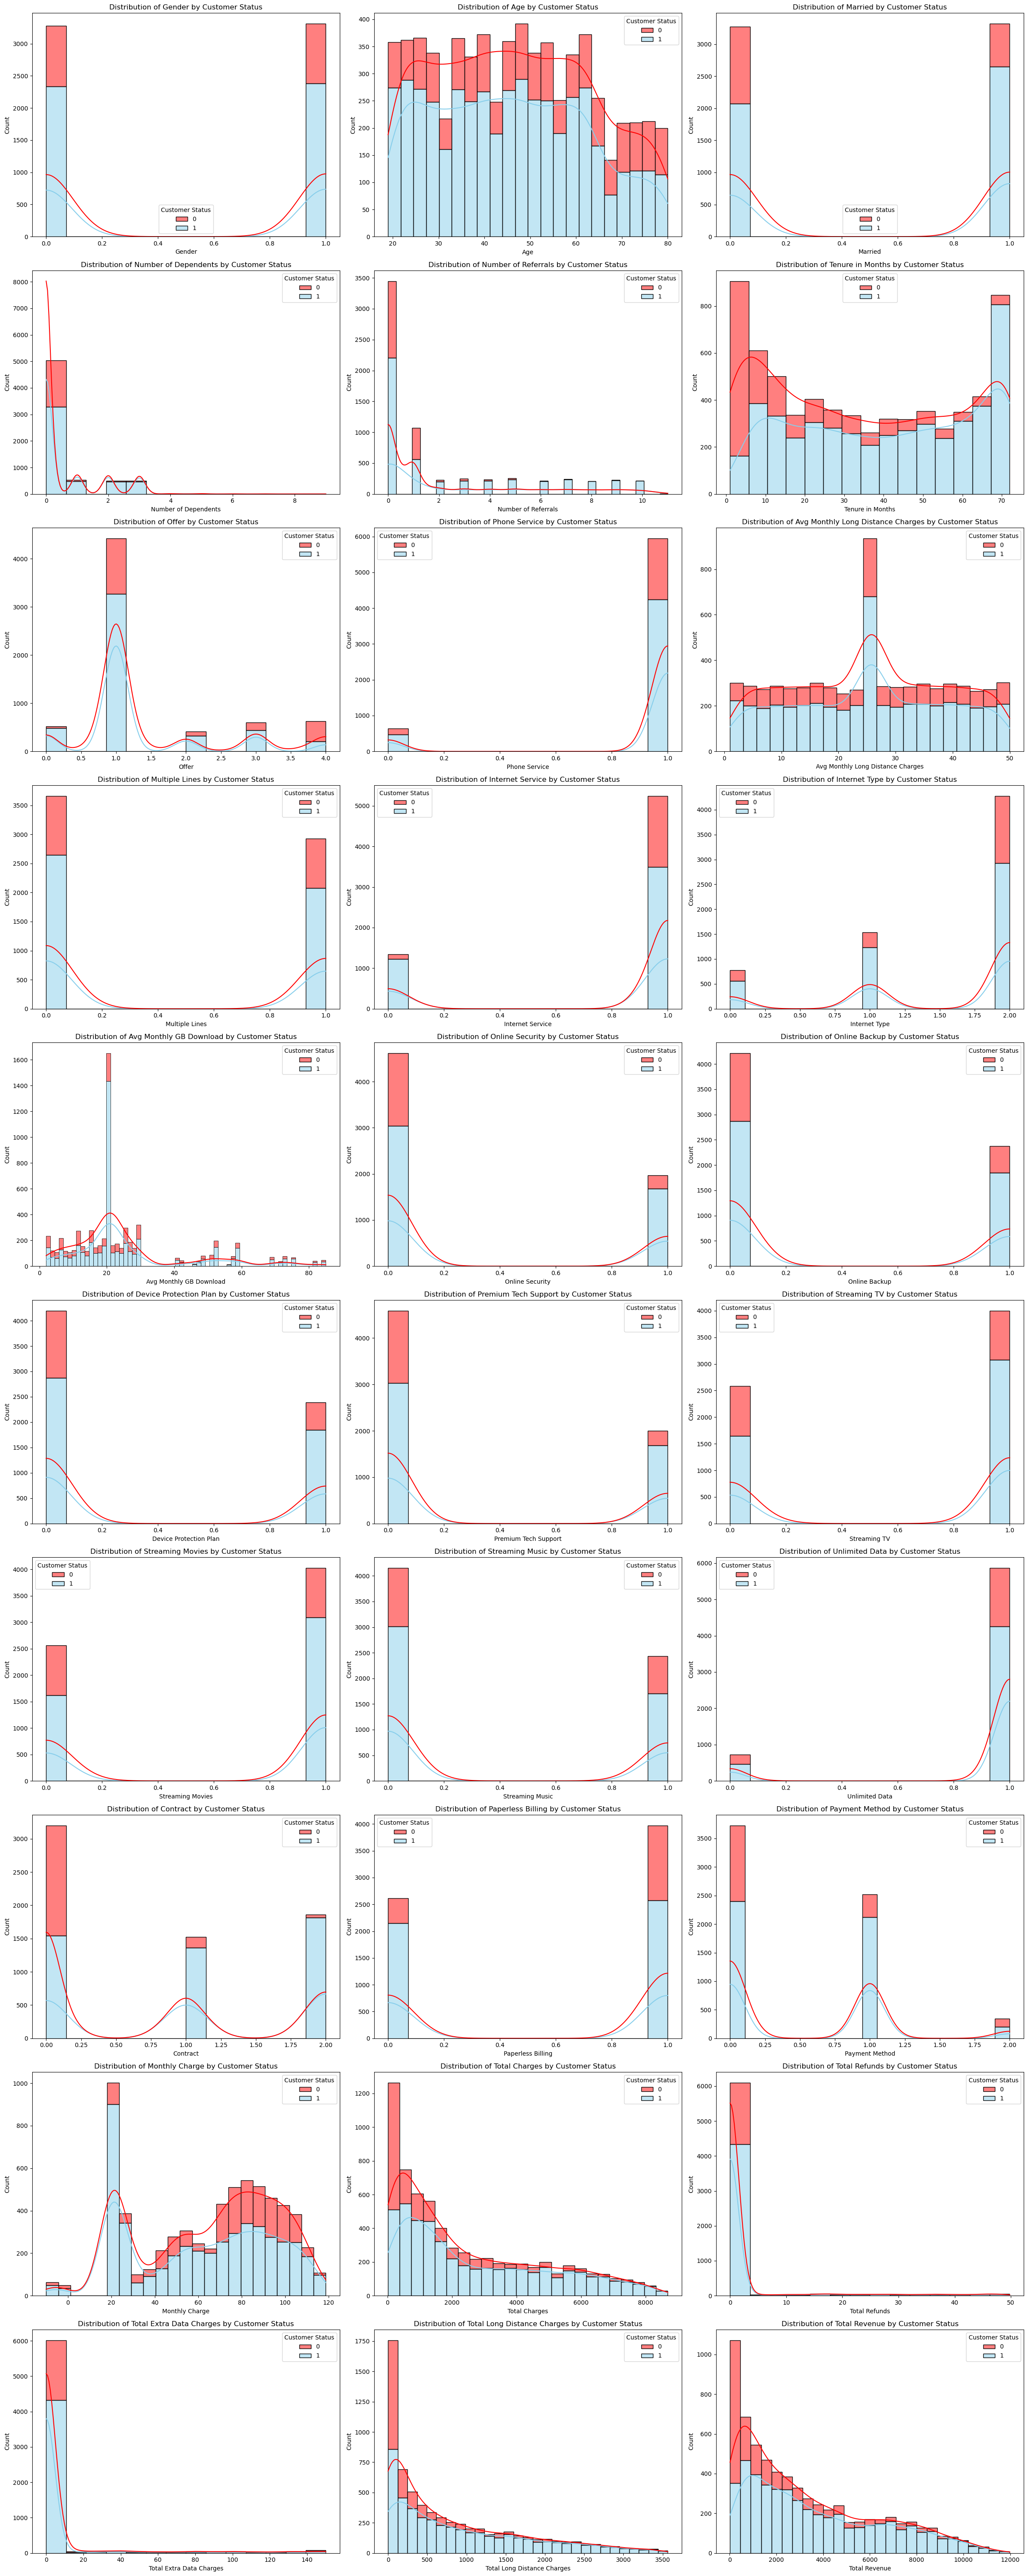

In [55]:
# Plotting the distribution of each feature with the target variable using histogram
# Setting Colour Pallete
colour = ['red','skyblue']
sns.set_palette(colour)
numerical_features = [col for col in Churn.columns if col != 'Customer Status']
# Defining the number of rows and columns for the grid
num_cols = 3
num_rows = (len(numerical_features) + num_cols - 1) // num_cols
# Creating a new figure outside of the loop
plt.figure(figsize=(8*num_cols, 6*num_rows))
# Plot the distribution 
for i, feature in enumerate(numerical_features):
    # Creating a new subplot with a frame
    ax = plt.subplot(num_rows, num_cols, i + 1, frameon=True)
    sns.histplot(x=feature, data=Churn, hue='Customer Status', kde=True, multiple='stack', ax=ax)
    plt.title(f"Distribution of {feature} by Customer Status")
    plt.xlabel(feature)
    plt.ylabel('Count')   
# Adjust layout
plt.tight_layout()
plt.savefig('Distribution of feature with the target variable using histogram.jpg') 
plt.show()

# Correlation Analysis for Multi-Collinearity Assessment

A statistical method for determining the direction and intensity of a relationship between two variables is correlation analysis. Correlation analysis is useful for identifying highly correlated features in a dataset when used in the context of multi-collinearity evaluation.When two or more independent variables in a regression model have a strong correlation with one another, this is known as multi-collinearity.

Correlation analysis is a key tool in machine learning that evaluates multi-collinearity between independent variables in a dataset. Understanding the correlations between characteristics is essential, particularly when building predictive models, and this analysis helps with that. Examining correlations can help identify characteristics that are redundant or highly linked, which can help with feature selection procedures and reduce the chance of overfitting. Moreover, when there are strong correlations, it becomes difficult to understand how each factor affects the target variable in linear models like linear regression. Therefore, by stabilizing coefficient estimates and reducing the possibility of inflated standard errors, detecting and resolving multi-collinearity through correlation analysis not only improves model interpretability but also promotes enhanced model performance.In the end, correlation analysis directs efforts in feature engineering, preprocessing, and model optimization, resulting in machine learning models that are more intelligent and resilient.

In [56]:
# Correlation Analysis
# Selecting only numerical features (excluding the target variable)
numerical_features = Churn.select_dtypes(include='number').drop(columns=['Customer Status'])
# Compute correlation matrix
correlation_matrix = numerical_features.corr()
# Display correlation matrix
print(correlation_matrix)

                                     Gender       Age   Married  \
Gender                             1.000000  0.007664  0.004971   
Age                                0.007664  1.000000 -0.014409   
Married                            0.004971 -0.014409  1.000000   
Number of Dependents               0.006321 -0.125500  0.322628   
Number of Referrals               -0.004353 -0.032019  0.663598   
Tenure in Months                   0.011547 -0.009574  0.359737   
Offer                              0.000158 -0.014222 -0.219395   
Phone Service                     -0.010518  0.007853  0.023813   
Avg Monthly Long Distance Charges  0.015720 -0.015403 -0.004581   
Multiple Lines                    -0.004748  0.098179  0.123751   
Internet Service                  -0.002584  0.110758 -0.021248   
Internet Type                     -0.001006  0.072746 -0.008508   
Avg Monthly GB Download           -0.014879 -0.505260  0.066664   
Online Security                   -0.017059 -0.046073  0.13219

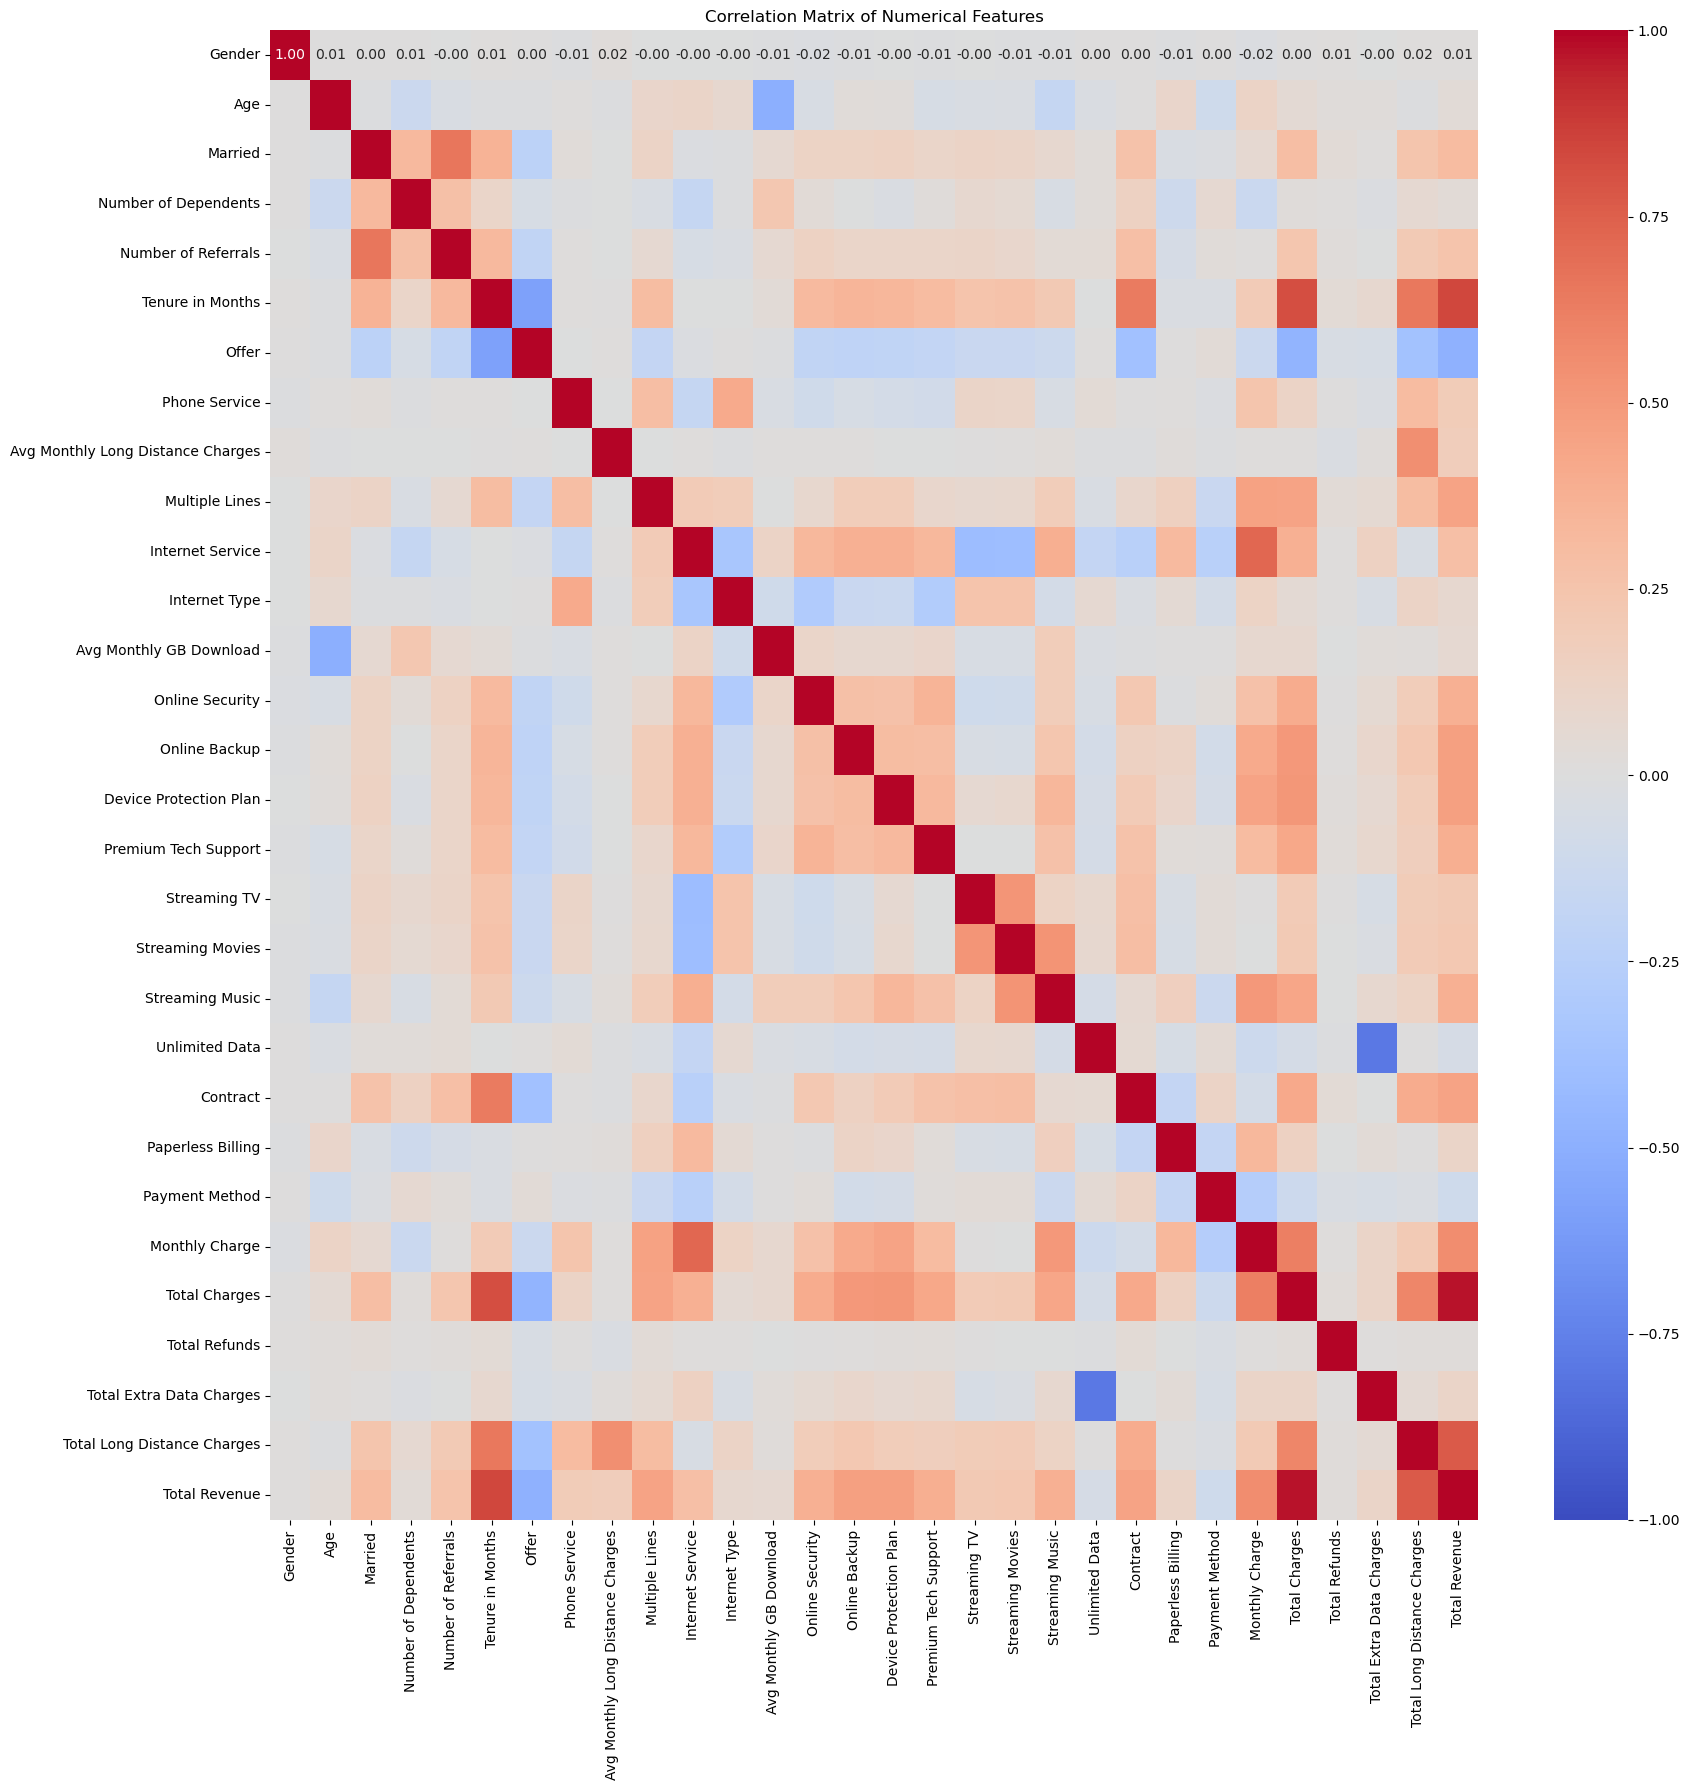

In [57]:
# Correlation PLot
plt.figure(figsize=(18, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
# Add title and adjust layout
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
# Show plot
plt.savefig('Correlation Matrix of Numerical Features.jpg')
plt.show()

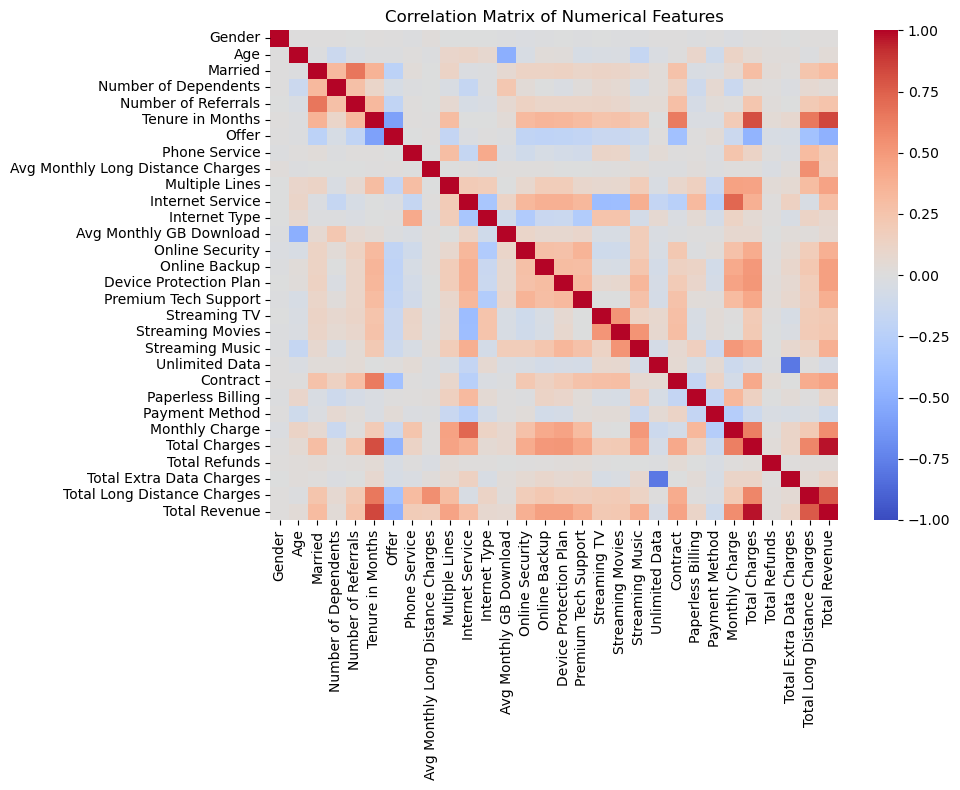

In [58]:
# Correlation PLot
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('Correlation Matrix.jpg')
plt.show()

In [59]:
# Checking for highly Correlated Features
# Setting a threshold for high correlation
threshold = 0.7
# Initializing a list to store highly correlated features pairs
highly_correlated_pairs = []
# Iterating through the correlation matrix
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            # Store the names of highly correlated features
            pair = (correlation_matrix.columns[i], correlation_matrix.columns[j])
            highly_correlated_pairs.append(pair)
if not highly_correlated_pairs:
    print("No highly correlated features found.")
else:
    print("Highly correlated feature pairs:")
    for pair in highly_correlated_pairs:
        print(pair)

Highly correlated feature pairs:
('Tenure in Months', 'Total Charges')
('Tenure in Months', 'Total Revenue')
('Internet Service', 'Monthly Charge')
('Unlimited Data', 'Total Extra Data Charges')
('Total Charges', 'Total Revenue')
('Total Long Distance Charges', 'Total Revenue')


In [60]:
# Removal of highly correlated features
Churn.drop(['Tenure in Months', 'Total Charges','Total Revenue', 'Internet Service', 'Monthly Charge','Unlimited Data', 
            'Total Extra Data Charges', 'Total Long Distance Charges'], axis =1, inplace= True)

In [61]:
#Checking Columns in dataset after feature removals
print(Churn.columns)

Index(['Gender', 'Age', 'Married', 'Number of Dependents',
       'Number of Referrals', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines', 'Internet Type',
       'Avg Monthly GB Download', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Contract', 'Paperless Billing',
       'Payment Method', 'Total Refunds', 'Customer Status'],
      dtype='object')


# Variance Inflation Factor (VIF) for Numerical Features

In [62]:
# Selecting only numerical columns
numerical_columns = Churn.select_dtypes(include=['int64', 'float64']).columns

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = numerical_columns
vif_data["VIF"] = [variance_inflation_factor(Churn[numerical_columns].values, i) for i in range(len(numerical_columns))]

print("Variance Inflation Factors:")
print(vif_data)

Variance Inflation Factors:
                             Feature       VIF
0                                Age  3.473696
1               Number of Dependents  1.413636
2                Number of Referrals  1.548201
3  Avg Monthly Long Distance Charges  3.865396
4            Avg Monthly GB Download  2.446347
5                      Total Refunds  1.065031


The Variance Inflation Factor showed that all the numerical features have a variance of less than 10, so none of them would be removed.

# Chi Square Test for Categorical Features

In [63]:
# Iterate over each feature (excluding the target variable) in the dataset
for feature in Churn.columns[:-1]:
    # Check if the feature is integer-encoded (assuming categorical)
    if Churn[feature].dtype == 'int32':
        # Create a contingency table for the feature and the target variable
        contingency_table = pd.crosstab(Churn[feature], Churn['Customer Status'])
        
        # Perform the chi-square test
        chi2_statistic, p_value, _, _ = chi2_contingency(contingency_table)
        
        # Print the results
        print(f"Chi-square test results for {feature}:")
        print(f"   Chi-square statistic: {chi2_statistic}")
        print(f"   P-value: {p_value}")
        
        # Check for significance (e.g., p-value < 0.05)
        if p_value < 0.05:
            print(f"   {feature} is statistically significant for predicting the target variable.")
        else:
            print(f"   {feature} is not statistically significant for predicting the target variable.")
        
        print()


Chi-square test results for Gender:
   Chi-square statistic: 0.24007105217966312
   P-value: 0.6241548018547587
   Gender is not statistically significant for predicting the target variable.

Chi-square test results for Married:
   Chi-square statistic: 220.5060439643492
   P-value: 7.014602453362894e-50
   Married is statistically significant for predicting the target variable.

Chi-square test results for Offer:
   Chi-square statistic: 616.067442659786
   P-value: 5.160127800791e-132
   Offer is statistically significant for predicting the target variable.

Chi-square test results for Phone Service:
   Chi-square statistic: 1.2551734871989866
   P-value: 0.26256666476273127
   Phone Service is not statistically significant for predicting the target variable.

Chi-square test results for Multiple Lines:
   Chi-square statistic: 1.1535971852605198
   P-value: 0.2827973969037025
   Multiple Lines is not statistically significant for predicting the target variable.

Chi-square test resu

In [64]:
# Removal of non statistically significant features
Churn.drop(["Gender", "Phone Service", "Multiple Lines"], axis =1, inplace= True)

In [65]:
# Checking Shape of dataset after removal of irrelevant features
Churn.shape

(6589, 20)

# Principal Component Analysis (PCA) for Dimensionality Reduction

# Data Splitting for Machine Learning

It is crucial to divide our dataset into distinct sets for training and testing in our machine learning workflow. This prevents overfitting, a situation in which the model performs well on training data but poorly on new data, and guarantees that we can evaluate our model's performance on unknown data.

Train-Test Split Technique:

Partitioning a dataset: Our dataset is first divided into two distinct sets:

a. Training Set: Our machine learning models are trained using this subset of the data. It makes up a large percentage of the dataset—usually between 70% - 80%.

b. Test Set: All of the remaining data will only be used to assess how well our trained models perform. In order to avoid bias or information leakage from the test set into the model, it should never be used during the training stage.

Random Sampling: We randomly choose instances from the whole dataset to construct both sets of data in order to ensure that our training and test sets are representative of the full dataset and to prevent any potential biases. By using random sampling, it is possible to guarantee that the distribution of classes or target variable values in both sets is comparable.

### Seperating Features and Target Variables

In [66]:
#Splitting the dataset into features (X) and target variable (Y)
X = Churn.drop(columns=['Customer Status'], axis=1)
Y = Churn["Customer Status"]

In [67]:
X.head()

Age  Married  Number of Dependents  Number of Referrals  Offer  \
0   37        1                     0                    2      1   
1   46        0                     0                    0      1   
2   50        0                     0                    0      4   
3   78        1                     0                    1      3   
4   75        1                     0                    3      1   

   Avg Monthly Long Distance Charges  Internet Type  Avg Monthly GB Download  \
0                              42.39              0                     16.0   
1                              10.69              0                     10.0   
2                              33.65              2                     30.0   
3                              27.82              2                      4.0   
4                               7.38              2                     11.0   

   Online Security  Online Backup  Device Protection Plan  \
0                0              1                       0   
1                0              0                       0   
2                0              0                       1   
3                0              1                       1   
4                0              0                       0   

   Premium Tech Support  Streaming TV  Streaming Movies  Streaming Music  \
0                     1             1                 0                0   
1                     0             0                 1                1   
2                     0             0                 0                0   
3                     0             1                 1                0   
4                     1             1                 0                0   

   Contract  Paperless Billing  Payment Method  Total Refunds  
0         1                  1               1           0.00  
1         0                  0               1          38.33  
2         0                  1               0           0.00  
3         0                  1               0           0.00  
4         0                  1               1           0.00

In [68]:
Y.head()

0    1
1    1
2    0
3    0
4    0
Name: Customer Status, dtype: int32

### Data Splitting

In [69]:
# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Checking the shape of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (4612, 19)
Shape of X_test: (1977, 19)
Shape of Y_train: (4612,)
Shape of Y_test: (1977,)


# Normalisation

In machine learning and statistics, normalization is a preprocessing technique that helps scale numerical data to a standard range. To stop any one feature from controlling the learning algorithm because of its greater magnitude, normalization aims to put all characteristics on the same scale.

This is how normalization functions:
1. Scaling: To ensure that every feature has the same range, the data must first be scaled. Usually, to do this, the feature's    mean is subtracted, and the result is divided by the standard deviation, yielding a distribution with a mean of 0 and a        standard deviation of 1.
2. Normalization is the process of bringing the values of the data inside a given range, usually between 0 and 1 or -1 and 1.      It is applied after the data has been scaled. Frequently, techniques like Z-score normalization and Min-Max scaling are used    to accomplish this.

The Normalisation technique used in this analysis is the Min-Max Scaling. In conclusion, by guaranteeing that the features are on a similar size and preventing problems like numerical instability and biased models, normalization aids in enhancing the performance and stability of machine learning algorithms.

In [70]:
scaler = MinMaxScaler()
# Fit the scaler on the training data and transform both training and testing data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [71]:
# Convert the scaled arrays back to DataFrames
X_train_scaled_df = pd.DataFrame(X_train)
X_test_scaled_df = pd.DataFrame(X_test)

# Display the first few rows of the scaled training data to see how the features were normalized
print("Scaled Training Data:")
print(X_train_scaled_df.head())

# Display the first few rows of the scaled testing data to see how the features were normalized
print("\nScaled Testing Data:")
print(X_test_scaled_df.head())

Scaled Training Data:
         0    1    2         3     4         5    6         7    8    9    10  \
0  0.180328  0.0  0.0  0.000000  0.25  0.748213  1.0  0.337349  0.0  1.0  1.0   
1  0.557377  1.0  0.0  0.363636  0.25  0.039616  0.0  0.289157  1.0  1.0  1.0   
2  0.131148  0.0  0.0  0.000000  0.25  0.114356  1.0  0.228916  0.0  0.0  0.0   
3  0.459016  0.0  0.0  0.000000  0.25  0.982642  1.0  0.277108  0.0  1.0  0.0   
4  0.065574  0.0  0.0  0.000000  0.25  0.580560  0.0  0.469880  1.0  1.0  0.0   

    11   12   13   14   15   16   17   18  
0  0.0  1.0  0.0  0.0  0.5  1.0  0.0  0.0  
1  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  
2  0.0  1.0  1.0  0.0  1.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
4  0.0  0.0  0.0  1.0  0.5  1.0  0.0  0.0  

Scaled Testing Data:
         0    1         2         3     4         5    6         7    8    9   \
0  0.606557  0.0  0.000000  0.000000  1.00  0.111497  0.5  0.228916  0.0  0.0   
1  0.491803  1.0  0.000000  0.909091  0.25 

In [72]:
Y_train.head()

1179    1
846     1
4942    1
319     0
3099    1
Name: Customer Status, dtype: int32

In [73]:
print(Y_train.value_counts())

Customer Status
1    3313
0    1299
Name: count, dtype: int64


# Target Variable Distribution & Upsampling

## Plotting Customer Status before upsampling

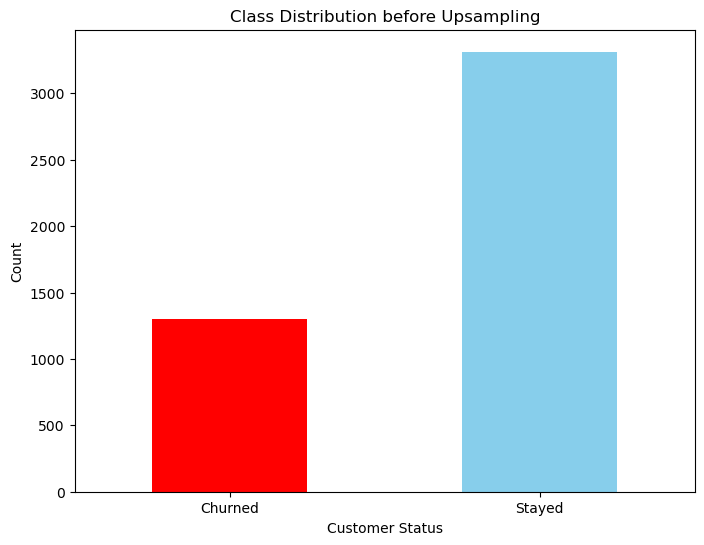

In [74]:
# Count the occurrences of each class
class_counts = Y_train.value_counts()

# Reorder the class counts so that Churned (0) is displayed before Stayed (1)
class_counts_reordered = class_counts.reindex([0, 1])

# Plot the class distribution
plt.figure(figsize=(8, 6))
class_counts_reordered.plot(kind='bar', color=['red', 'skyblue',])
plt.xlabel('Customer Status')
plt.ylabel('Count')
plt.title('Class Distribution before Upsampling')
plt.xticks([0, 1], ['Churned', 'Stayed'], rotation=0)  # Set x-axis ticks to display class labels
plt.show()


##  Upsampling 

In [75]:
# Initialize SMOTE with a desired sampling strategy
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Upsample the minority class in the training data
X_train, Y_train = smote.fit_resample(X_train, Y_train)


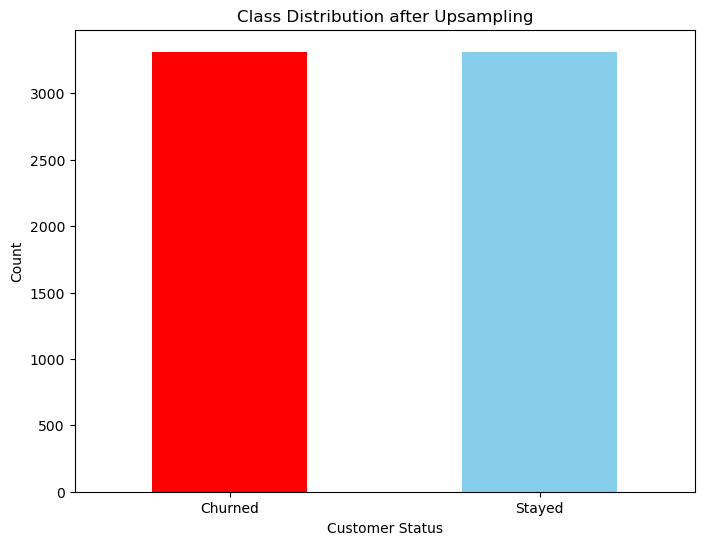

In [76]:
# Count the occurrences of each class after upsampling
class_counts_resampled = Y_train.value_counts()

# Reorder the class counts so that Churned (0) is displayed before Stayed (1)
class_counts_resampled_reordered = class_counts_resampled.reindex([0, 1])

# Plot the class distribution after upsampling
plt.figure(figsize=(8, 6))
class_counts_resampled_reordered.plot(kind='bar', color=['red', 'skyblue'])
plt.xlabel('Customer Status')
plt.ylabel('Count')
plt.title('Class Distribution after Upsampling')
plt.xticks([0, 1], ['Churned', 'Stayed'], rotation=0)  # Set x-axis ticks to display class labels
plt.show()

In [77]:
print(Y_train.value_counts())

Customer Status
1    3313
0    3313
Name: count, dtype: int64


# Machine Learning Algorithms

## Random Forest Classifier

In [78]:
# Train a Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, Y_train)

RandomForestClassifier()